In [224]:
from google.colab import files
uploaded= files.upload()

Saving Economic Data - 9 Countries (1980-2020).csv to Economic Data - 9 Countries (1980-2020) (1).csv


Fuente: https://www.kaggle.com/datasets/pratik453609/economic-data-9-countries-19802020

In [226]:
#Librerias usadas
import io 
import pandas as pd
import  itertools
import numpy as np
import seaborn as sns #GRAFICOS
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import matplotlib.pyplot as plt #GRAFICOS
import plotly.express as px #GRAFICOS (torta)
import plotly.graph_objs as go #GRAFICOS
import plotly.io as pio #GRAFICOS
pio.templates #GRAFICOS(black)
import requests#INGRESO A LA API PÚBLICA
import json
import yfinance as yf #Importamos paquetes para poder correr los datos(previamente activar el pip install yfinance)
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from numpy.linalg import eig #Metodo eig de algebra lineal#Eigenvalores & Eigenvectores
from sklearn import preprocessing# Para estandarizar los datos.
from sklearn.linear_model import LinearRegression# Modelo.
from sklearn.metrics import mean_squared_error# Métricas.
from sklearn import linear_model
datos_economicos= pd.read_csv(io.BytesIO(uploaded['Economic Data - 9 Countries (1980-2020).csv']))

In [227]:
#EDA
#Resumen de todas las variables segun su tipo, numericas o categorica de  nuestra tabla. 
datos_economicos

stock index                   country    year  index price  \
0        NASDAQ  United States of America 1,980.0        168.6   
1        NASDAQ  United States of America 1,981.0        203.2   
2        NASDAQ  United States of America 1,982.0        189.0   
3        NASDAQ  United States of America 1,983.0        285.4   
4        NASDAQ  United States of America 1,984.0        248.9   
..          ...                       ...     ...          ...   
364      IEX 35                     Spain 2,016.0      9,352.1   
365      IEX 35                     Spain 2,017.0     10,043.9   
366      IEX 35                     Spain 2,018.0      8,539.9   
367      IEX 35                     Spain 2,019.0      9,549.2   
368      IEX 35                     Spain 2,020.0      8,073.7   

     log_indexprice  inflationrate  oil prices  exchange_rate  gdppercent  \
0               2.2            0.1        21.6            1.0         0.1   
1               2.3            0.1        31.8            1.0         0.1   
2               2.3            0.1        28.5            1.0         0.0   
3               2.5            0.0        26.2            1.0         0.1   
4               2.4            0.0        25.9            1.0         0.1   
..              ...            ...         ...            ...         ...   
364             4.0            NaN        52.0            1.1         0.0   
365             4.0            0.0        57.9            1.1         0.0   
366             3.9            0.0        49.5            1.2         0.0   
367             4.0            0.0        59.9            1.1         0.0   
368             3.9            NaN        47.0            1.1        -0.1   

     percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
0           12,575.0               0.1                  NaN         -13.1   
1           13,976.0               0.1                  NaN         -12.5   
2           14,434.0               0.1                  NaN         -20.0   
3           15,544.0               0.1                  NaN         -51.6   
4           17,121.0               0.1                  NaN        -102.7   
..               ...               ...                  ...           ...   
364         26,523.0               0.2                139.0          49.2   
365         28,170.0               0.2                148.8          47.3   
366         30,389.0               0.1                158.3          38.7   
367         29,565.0               0.1                155.5          41.9   
368         27,057.0               0.2                143.1          19.1   

     USTreasury  
0           0.1  
1           0.1  
2           0.1  
3           0.1  
4           0.1  
..          ...  
364         0.0  
365         0.0  
366         0.0  
367         0.0  
368         0.0  

[369 rows x 14 columns]

In [228]:
datos_economicos.head(20)

stock index                   country    year  index price  log_indexprice  \
0       NASDAQ  United States of America 1,980.0        168.6             2.2   
1       NASDAQ  United States of America 1,981.0        203.2             2.3   
2       NASDAQ  United States of America 1,982.0        189.0             2.3   
3       NASDAQ  United States of America 1,983.0        285.4             2.5   
4       NASDAQ  United States of America 1,984.0        248.9             2.4   
5       NASDAQ  United States of America 1,985.0        290.2             2.5   
6       NASDAQ  United States of America 1,986.0        367.0             2.6   
7       NASDAQ  United States of America 1,987.0        402.6             2.6   
8       NASDAQ  United States of America 1,988.0        374.4             2.6   
9       NASDAQ  United States of America 1,989.0        437.8             2.6   
10      NASDAQ  United States of America 1,990.0        409.2             2.6   
11      NASDAQ  United States of America 1,991.0        491.7             2.7   
12      NASDAQ  United States of America 1,992.0        599.3             2.8   
13      NASDAQ  United States of America 1,993.0        715.2             2.9   
14      NASDAQ  United States of America 1,994.0        751.6             2.9   
15      NASDAQ  United States of America 1,995.0        925.2             3.0   
16      NASDAQ  United States of America 1,996.0      1,165.0             3.1   
17      NASDAQ  United States of America 1,997.0      1,469.5             3.2   
18      NASDAQ  United States of America 1,998.0      1,794.9             3.2   
19      NASDAQ  United States of America 1,999.0      2,728.2             3.4   

    inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0             0.1        21.6            1.0         0.1         12,575.0   
1             0.1        31.8            1.0         0.1         13,976.0   
2             0.1        28.5            1.0         0.0         14,434.0   
3             0.0        26.2            1.0         0.1         15,544.0   
4             0.0        25.9            1.0         0.1         17,121.0   
5             0.0        24.1            1.0         0.1         18,237.0   
6             0.0        12.5            1.0         0.1         19,071.0   
7             0.0        15.4            1.0         0.1         20,039.0   
8             0.0        12.6            1.0         0.1         21,417.0   
9             0.1        15.9            1.0         0.1         22,857.0   
10            0.1        27.3            1.0         0.0         23,889.0   
11            0.0        19.5            1.0         NaN         24,342.0   
12            0.0        19.4            1.0         0.0         25,419.0   
13            0.0        14.5            1.0         0.0         26,387.0   
14            0.0        17.2            1.0         0.0         27,695.0   
15            0.0        19.0            1.0         0.0         28,691.0   
16            0.0        25.2            1.0         0.0         29,968.0   
17            0.0        18.3            1.0         0.0         31,459.0   
18            0.0        11.3            1.0         0.1         32,854.0   
19            0.0        26.1            1.0         0.1         34,514.0   

    unemploymentrate  manufacturingoutput  tradebalance  USTreasury  
0                0.1                  NaN         -13.1         0.1  
1                0.1                  NaN         -12.5         0.1  
2                0.1                  NaN         -20.0         0.1  
3                0.1                  NaN         -51.6         0.1  
4                0.1                  NaN        -102.7         0.1  
5                0.1                  NaN        -114.0         0.1  
6                0.1                  NaN        -131.9         0.1  
7                0.1                  NaN        -144.8         0.1  
8                0.1                  NaN        -109

In [229]:
#Se cambia la columna year de float a (int)
datos_economicos.year=datos_economicos.year.astype(int)

In [230]:
#Ajustamos a un decimal los valores
pd.options.display.float_format='{:,.1f}'.format

In [231]:
#Se agrega una 'variable sintética'que identifica el hecho mas relevante en ese año, que pueda darnos indicios de un cambio.
#Se duplica la columna 'year' para luego reemplazarla por otros valores.
he=datos_economicos['year']
datos_economicos=datos_economicos.assign(Hecho_historico=he.values)

#Convierte la columna'Hecho_historico' y lo devuelve en un array aplanado para ser reemplazado numericamente.
datos_economicos ["Hecho_historico"].unique()

#El presedente histórico se reemplaza con valores del 1-9, como hecho mas relevante en el año en este diccionario.
valores_hist= {"Hecho_historico":{1980: 1, 1981:4, 1982: 1, 1983: 1, 1984: 1,
       1985: 4, 1986: 5, 1987: 2, 1988: 1, 1989: 3, 1990: 1, 1991: 2, 1992: 3, 1993: 4, 1994: 7, 1995: 5, 1996: 1, 1997: 4, 1998: 1 , 1999: 1, 2000: 4, 2001: 8, 2002: 4 , 2003: 1, 2004: 5, 2005: 1, 2006: 1, 2007: 2, 2008: 2 , 2009: 4, 2010: 9, 2011: 5,2012: 4, 2013: 1,2014: 1 , 2015: 9, 2016: 9, 2017: 4,2018: 4, 2019: 4,2020: 9,}}
datos_economicos.replace(valores_hist, inplace=True)
datos_economicos.head(10)

stock index                   country  year  index price  log_indexprice  \
0      NASDAQ  United States of America  1980        168.6             2.2   
1      NASDAQ  United States of America  1981        203.2             2.3   
2      NASDAQ  United States of America  1982        189.0             2.3   
3      NASDAQ  United States of America  1983        285.4             2.5   
4      NASDAQ  United States of America  1984        248.9             2.4   
5      NASDAQ  United States of America  1985        290.2             2.5   
6      NASDAQ  United States of America  1986        367.0             2.6   
7      NASDAQ  United States of America  1987        402.6             2.6   
8      NASDAQ  United States of America  1988        374.4             2.6   
9      NASDAQ  United States of America  1989        437.8             2.6   

   inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0            0.1        21.6            1.0         0.1         12,575.0   
1            0.1        31.8            1.0         0.1         13,976.0   
2            0.1        28.5            1.0         0.0         14,434.0   
3            0.0        26.2            1.0         0.1         15,544.0   
4            0.0        25.9            1.0         0.1         17,121.0   
5            0.0        24.1            1.0         0.1         18,237.0   
6            0.0        12.5            1.0         0.1         19,071.0   
7            0.0        15.4            1.0         0.1         20,039.0   
8            0.0        12.6            1.0         0.1         21,417.0   
9            0.1        15.9            1.0         0.1         22,857.0   

   unemploymentrate  manufacturingoutput  tradebalance  USTreasury  \
0               0.1                  NaN         -13.1         0.1   
1               0.1                  NaN         -12.5         0.1   
2               0.1                  NaN         -20.0         0.1   
3               0.1                  NaN         -51.6         0.1   
4               0.1                  NaN        -102.7         0.1   
5               0.1                  NaN        -114.0         0.1   
6               0.1                  NaN        -131.9         0.1   
7               0.1                  NaN        -144.8         0.1   
8               0.1                  NaN        -109.4         0.1   
9               0.1                  NaN         -86.7         0.1   

   Hecho_historico  
0                1  
1                4  
2                1  
3                1  
4                1  
5                4  
6                5  
7                2  
8                1  
9                3

In [232]:
datos_economicos.describe()

year  index price  log_indexprice  inflationrate  oil prices  \
count   369.0        317.0           369.0          326.0       369.0   
mean  2,000.0      7,898.6             3.6            0.0        39.7   
std      11.8      7,811.3             0.5            0.0        25.5   
min   1,980.0        168.6             2.2           -0.0        11.3   
25%   1,990.0      2,407.1             3.3            0.0        19.4   
50%   2,000.0      5,160.1             3.6            0.0        28.5   
75%   2,010.0     10,279.5             4.0            0.1        57.9   
max   2,020.0     47,751.3             4.7            0.2        98.6   

       exchange_rate  gdppercent  percapitaincome  unemploymentrate  \
count          367.0       350.0            368.0             348.0   
mean            27.9         0.0         20,720.0               0.1   
std             49.6         0.0         17,435.0               0.0   
min              0.9        -0.1             27.0               0.0   
25%              1.3         0.0          2,090.2               0.0   
50%              5.4         0.0         19,969.5               0.1   
75%             15.1         0.1         36,384.0               0.1   
max            249.1         0.1         65,280.0               0.3   

       manufacturingoutput  tradebalance  USTreasury  Hecho_historico  
count                278.0         365.0       369.0            369.0  
mean                 328.1         -16.0         0.1              3.5  
std                  622.4         154.6         0.0              2.5  
min                    0.6        -770.9         0.0              1.0  
25%                   80.4         -25.4         0.0              1.0  
50%                  188.2          -0.1         0.1              4.0  
75%                  272.0          19.1         0.1              4.0  
max                3,868.5         366.1         0.1              9.0

In [233]:
#Tamaño del Dataset
#Hacemos un shape para saber el tamaño del dataset
datos_economicos.shape

(369, 15)

In [234]:
#Vemos el producto de las filas x las columnas.
datos_economicos.size

5535

In [235]:
#14 Variables o dimensión de nuestro análisis.
datos_economicos.head(1)

stock index                   country  year  index price  log_indexprice  \
0      NASDAQ  United States of America  1980        168.6             2.2   

   inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0            0.1        21.6            1.0         0.1         12,575.0   

   unemploymentrate  manufacturingoutput  tradebalance  USTreasury  \
0               0.1                  NaN         -13.1         0.1   

   Hecho_historico  
0                1

In [236]:
#DATA WRANGLING PASO 1-DESCUBRIMIENTO- TIPOS DE DATOS.
#tipos de datos
datos_economicos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 369 non-null    int64  
 3   index price          317 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        326 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        367 non-null    float64
 8   gdppercent           350 non-null    float64
 9   percapitaincome      368 non-null    float64
 10  unemploymentrate     348 non-null    float64
 11  manufacturingoutput  278 non-null    float64
 12  tradebalance         365 non-null    float64
 13  USTreasury           369 non-null    float64
 14  Hecho_historico      369 non-null    int64  
dtypes: float64(11), int64(2), object(2)
memo

In [237]:
#Datos object,float,int son los que comprende este dataset.
datos_economicos.dtypes

stock index             object
country                 object
year                     int64
index price            float64
log_indexprice         float64
inflationrate          float64
oil prices             float64
exchange_rate          float64
gdppercent             float64
percapitaincome        float64
unemploymentrate       float64
manufacturingoutput    float64
tradebalance           float64
USTreasury             float64
Hecho_historico          int64
dtype: object

In [238]:
#DATA WRANGLING ESTRUCTURACIÓN.
# Se corrige y se remplaza los datos NaN de la columna 'manufacturingoutput' por (0).
datos_economicos['manufacturingoutput']
datos_economicos["manufacturingoutput"]= datos_economicos["manufacturingoutput"]. fillna(0)

In [239]:
#Se verifíca el dataset.
datos_economicos.head(100)

stock index                   country  year  index price  log_indexprice  \
0       NASDAQ  United States of America  1980        168.6             2.2   
1       NASDAQ  United States of America  1981        203.2             2.3   
2       NASDAQ  United States of America  1982        189.0             2.3   
3       NASDAQ  United States of America  1983        285.4             2.5   
4       NASDAQ  United States of America  1984        248.9             2.4   
..         ...                       ...   ...          ...             ...   
95    Nifty 50                     India  1993      3,346.1             3.5   
96    Nifty 50                     India  1994      3,926.9             3.6   
97    Nifty 50                     India  1995      3,110.5             3.5   
98    Nifty 50                     India  1996      3,085.2             3.5   
99    Nifty 50                     India  1997      3,659.0             3.6   

    inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0             0.1        21.6            1.0         0.1         12,575.0   
1             0.1        31.8            1.0         0.1         13,976.0   
2             0.1        28.5            1.0         0.0         14,434.0   
3             0.0        26.2            1.0         0.1         15,544.0   
4             0.0        25.9            1.0         0.1         17,121.0   
..            ...         ...            ...         ...              ...   
95            0.1        14.5           31.3         0.1            301.0   
96            0.1        17.2           31.4         0.1            346.0   
97            0.1        19.0           32.4         0.1            374.0   
98            0.1        25.2           35.5         0.1            400.0   
99            0.1        18.3           36.4         0.0            415.0   

    unemploymentrate  manufacturingoutput  tradebalance  USTreasury  \
0                0.1                  0.0         -13.1         0.1   
1                0.1                  0.0         -12.5         0.1   
2                0.1                  0.0         -20.0         0.1   
3                0.1                  0.0         -51.6         0.1   
4                0.1                  0.0        -102.7         0.1   
..               ...                  ...           ...         ...   
95               0.1                 44.5           0.1         0.1   
96               0.1                 54.9          -1.0         0.1   
97               0.1                 64.4          -4.2         0.1   
98               0.1                 69.1          -4.5         0.1   
99               0.1                 68.7          -5.2         0.1   

    Hecho_historico  
0                 1  
1                 4  
2                 1  
3                 1  
4                 1  
..              ...  
95                4  
96                7  
97                5  
98                1  
99                4  

[100 rows x 15 columns]

In [240]:
#DATA WRANGLING-LIMPIEZA.
#NULL Y NaN.
datos_economicos.isna().sum()

stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput     0
tradebalance            4
USTreasury              0
Hecho_historico         0
dtype: int64

In [241]:
#DATA WRANGLING-LIMPIEZA.
#NULL Y NaN.
datos_economicos.isnull().sum()

stock index             0
country                 0
year                    0
index price            52
log_indexprice          0
inflationrate          43
oil prices              0
exchange_rate           2
gdppercent             19
percapitaincome         1
unemploymentrate       21
manufacturingoutput     0
tradebalance            4
USTreasury              0
Hecho_historico         0
dtype: int64

In [242]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#52 NULL Y NaN 'index price'
datos_economicos['index price']
#Transformación de datos NaN a números.
datos_economicos["index price"]= datos_economicos["index price"]. fillna(0)
datos_economicos['index price']

0        168.6
1        203.2
2        189.0
3        285.4
4        248.9
        ...   
364    9,352.1
365   10,043.9
366    8,539.9
367    9,549.2
368    8,073.7
Name: index price, Length: 369, dtype: float64

In [243]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#2 NULL Y NaN 'exchange_rate'.
datos_economicos['exchange_rate']
#Transformación de datos NaN a números.
datos_economicos["exchange_rate"]= datos_economicos["exchange_rate"]. fillna(0)
datos_economicos['exchange_rate']

0     1.0
1     1.0
2     1.0
3     1.0
4     1.0
       ..
364   1.1
365   1.1
366   1.2
367   1.1
368   1.1
Name: exchange_rate, Length: 369, dtype: float64

In [244]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#43 NULL Y NaN 'inflationrate'.
datos_economicos['inflationrate']
#Transformación de datos NaN a números.
datos_economicos["inflationrate"]= datos_economicos["inflationrate"]. fillna(0)
datos_economicos['inflationrate']

0     0.1
1     0.1
2     0.1
3     0.0
4     0.0
       ..
364   0.0
365   0.0
366   0.0
367   0.0
368   0.0
Name: inflationrate, Length: 369, dtype: float64

In [245]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#19 NULL Y NaN 'gdppercent'.
datos_economicos['gdppercent']
# Transformación de datos NaN a números.
datos_economicos["gdppercent"]= datos_economicos["gdppercent"]. fillna(0)
datos_economicos['gdppercent']

0      0.1
1      0.1
2      0.0
3      0.1
4      0.1
      ... 
364    0.0
365    0.0
366    0.0
367    0.0
368   -0.1
Name: gdppercent, Length: 369, dtype: float64

In [246]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#21 NUUL Y NaN 'unemploymentrate'
datos_economicos['unemploymentrate']
#Transformación de datos NaN a números.
datos_economicos["unemploymentrate"]= datos_economicos["unemploymentrate"]. fillna(0)
datos_economicos['unemploymentrate']

0     0.1
1     0.1
2     0.1
3     0.1
4     0.1
       ..
364   0.2
365   0.2
366   0.1
367   0.1
368   0.2
Name: unemploymentrate, Length: 369, dtype: float64

In [247]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
#4 NUUL Y NaN 'tradebalance'.
datos_economicos['tradebalance']
#Transformación de datos NaN a números.
datos_economicos["tradebalance"]= datos_economicos["tradebalance"]. fillna(0)
datos_economicos['tradebalance']

0      -13.1
1      -12.5
2      -20.0
3      -51.6
4     -102.7
       ...  
364     49.2
365     47.3
366     38.7
367     41.9
368     19.1
Name: tradebalance, Length: 369, dtype: float64

In [248]:
#Se corrigen los datos Null y NaN de las siguientes variables y se reemplazan por (0).
datos_economicos["manufacturingoutput"]
#Transformación de datos NaN a números.
datos_economicos["manufacturingoutput"]= datos_economicos["manufacturingoutput"]. fillna(0)
datos_economicos["manufacturingoutput"]

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
364   139.0
365   148.8
366   158.3
367   155.5
368   143.1
Name: manufacturingoutput, Length: 369, dtype: float64

In [249]:
#Verificamos datos faltantes de nuestras varibles mediante un ´count´ en caso de borrar o agregar faltantes.
datos_economicos.count()

stock index            369
country                369
year                   369
index price            369
log_indexprice         369
inflationrate          369
oil prices             369
exchange_rate          369
gdppercent             369
percapitaincome        368
unemploymentrate       369
manufacturingoutput    369
tradebalance           369
USTreasury             369
Hecho_historico        369
dtype: int64

In [250]:
#Completamos un dato faltante en la variable 'percapitaincome' y le agregamos la (media).
#Completamos ese dato faltante con la media para que no sea un cambio brusco en nuestro dataset.
datos_economicos['percapitaincome'].fillna(datos_economicos['percapitaincome'].dropna().median(),inplace=True)

In [251]:
#Verificamos con un ´count´.
datos_economicos.count()

stock index            369
country                369
year                   369
index price            369
log_indexprice         369
inflationrate          369
oil prices             369
exchange_rate          369
gdppercent             369
percapitaincome        369
unemploymentrate       369
manufacturingoutput    369
tradebalance           369
USTreasury             369
Hecho_historico        369
dtype: int64

In [252]:
#Datos duplicados.
datos_economicos.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
364    False
365    False
366    False
367    False
368    False
Length: 369, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd538d5d00>,
      dtype=object)

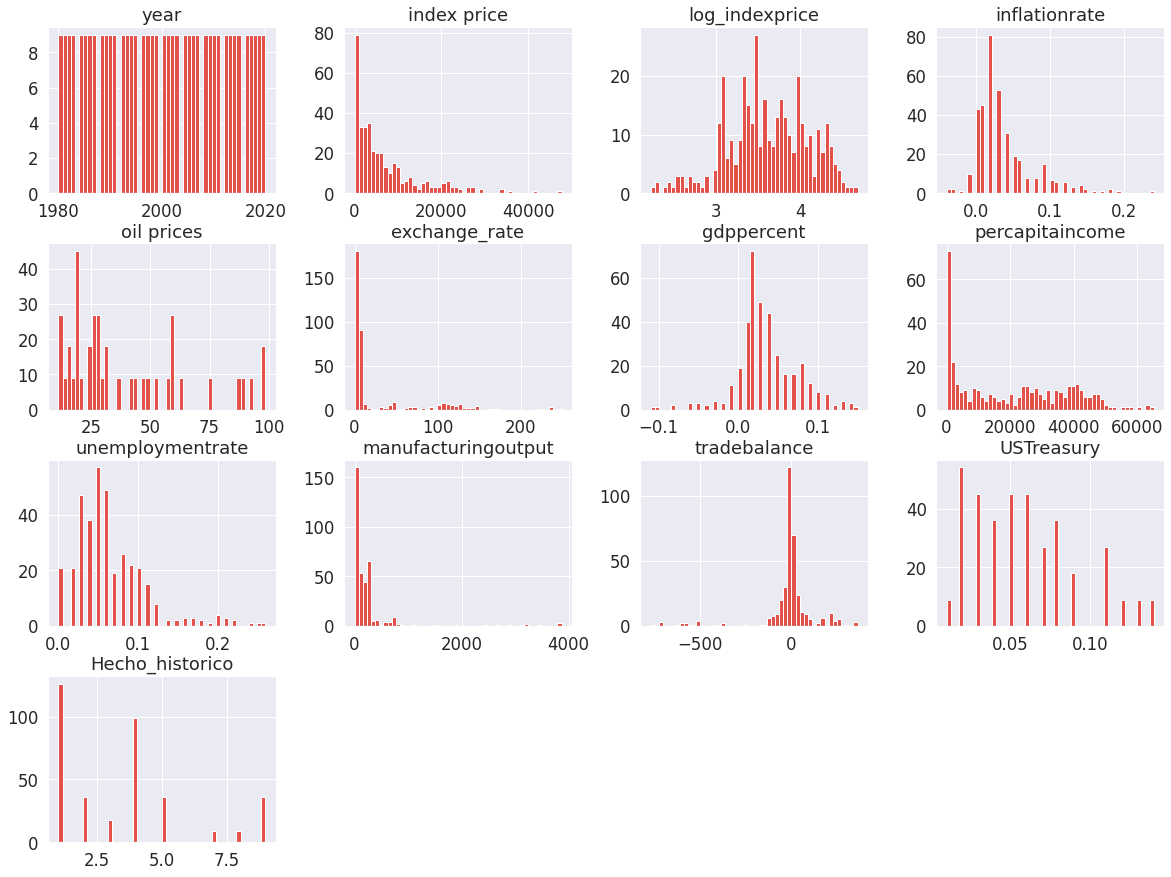

In [31]:
#Graficamos en histogramas de todas las variables numericas.
datos_economicos.hist(bins=50, figsize=(20,15))

In [225]:
#Utilizamos la API pública de yahoo financial 
#Bajamos el paquete de yahoo finace API para correr los datos nuevos
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [253]:
#Datos enriquecidos.
#Crude Oil
#Fuente
#https://finance.yahoo.com/quote/CL%3DF?p=CL%3DF
simbolo= 'CL=F'# Aqui muestra el ticket
petroleo= yf.Ticker(simbolo)
#Le hacemos una consulta
petroleo.history(period='max')

Open  High  Low  Close  Volume  Dividends  \
Date                                                                   
2000-08-23 00:00:00-04:00  32.0  32.8 32.0   32.0   79385        0.0   
2000-08-24 00:00:00-04:00  31.9  32.2 31.4   31.6   72978        0.0   
2000-08-25 00:00:00-04:00  31.7  32.1 31.3   32.0   44601        0.0   
2000-08-28 00:00:00-04:00  32.0  32.9 31.9   32.9   46770        0.0   
2000-08-29 00:00:00-04:00  32.8  33.0 32.6   32.7   49131        0.0   
...                         ...   ...  ...    ...     ...        ...   
2023-01-18 00:00:00-05:00  81.0  82.4 78.9   79.5   92549        0.0   
2023-01-19 00:00:00-05:00  79.1  81.2 78.1   80.3   58863        0.0   
2023-01-20 00:00:00-05:00  80.6  81.6 79.7   81.3  300145        0.0   
2023-01-23 00:00:00-05:00  81.8  82.6 81.1   81.6  300145        0.0   
2023-01-24 00:00:00-05:00  81.6  82.2 80.5   80.6  151825        0.0   

                           Stock Splits  
Date                                     
2000-08-23 00:00:00-04:00           0.0  
2000-08-24 00:00:00-04:00           0.0  
2000-08-25 00:00:00-04:00           0.0  
2000-08-28 00:00:00-04:00           0.0  
2000-08-29 00:00:00-04:00           0.0  
...                                 ...  
2023-01-18 00:00:00-05:00           0.0  
2023-01-19 00:00:00-05:00           0.0  
2023-01-20 00:00:00-05:00           0.0  
2023-01-23 00:00:00-05:00           0.0  
2023-01-24 00:00:00-05:00           0.0  

[5631 rows x 7 columns]

In [254]:
#Asignamos un nuevo dataframe
df_nuevo=petroleo.history(period='max')

In [255]:
#Hacemos un discribe de esta nueva base de datos.
df_nuevo.describe()

Open    High     Low   Close      Volume  Dividends  Stock Splits
count 5,631.0 5,631.0 5,631.0 5,631.0     5,631.0    5,631.0       5,631.0
mean     63.6    64.6    62.6    63.6   303,077.7        0.0           0.0
std      25.8    26.1    25.5    25.8   217,294.9        0.0           0.0
min     -14.0    13.7   -40.3   -37.6         0.0        0.0           0.0
25%      43.9    45.0    43.0    44.0   113,744.5        0.0           0.0
50%      60.9    61.8    60.0    61.0   266,915.0        0.0           0.0
75%      84.4    85.7    82.9    84.3   403,257.5        0.0           0.0
max     145.2   147.3   143.2   145.3 2,288,230.0        0.0           0.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd52dcc040>,
      dtype=object)

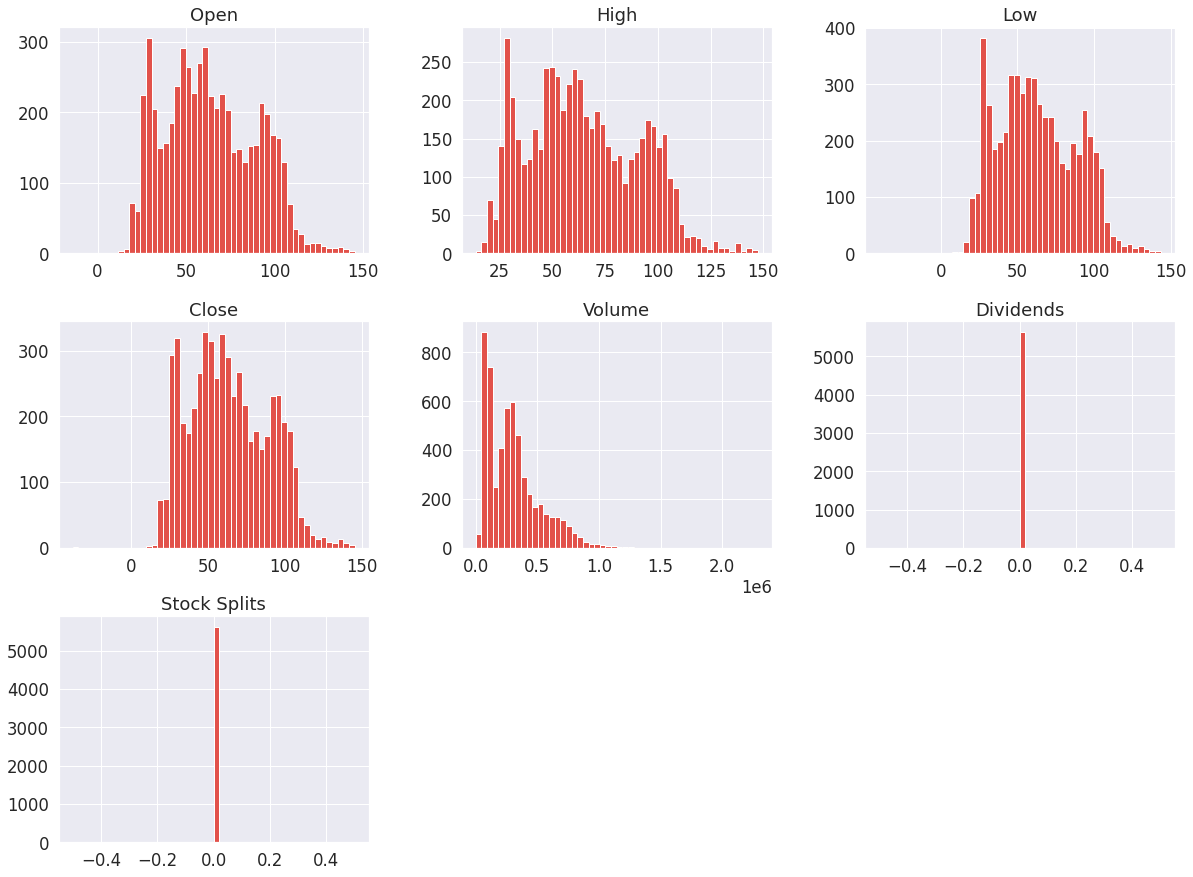

In [35]:
#Graficamos en histogramas todas las variables numericas del nuevo dataframe.
df_nuevo.hist(bins=50, figsize=(20,15))

In [256]:
df_nuevo


Open  High  Low  Close  Volume  Dividends  \
Date                                                                   
2000-08-23 00:00:00-04:00  32.0  32.8 32.0   32.0   79385        0.0   
2000-08-24 00:00:00-04:00  31.9  32.2 31.4   31.6   72978        0.0   
2000-08-25 00:00:00-04:00  31.7  32.1 31.3   32.0   44601        0.0   
2000-08-28 00:00:00-04:00  32.0  32.9 31.9   32.9   46770        0.0   
2000-08-29 00:00:00-04:00  32.8  33.0 32.6   32.7   49131        0.0   
...                         ...   ...  ...    ...     ...        ...   
2023-01-18 00:00:00-05:00  81.0  82.4 78.9   79.5   92549        0.0   
2023-01-19 00:00:00-05:00  79.1  81.2 78.1   80.3   58863        0.0   
2023-01-20 00:00:00-05:00  80.6  81.6 79.7   81.3  300145        0.0   
2023-01-23 00:00:00-05:00  81.8  82.6 81.1   81.6  300145        0.0   
2023-01-24 00:00:00-05:00  81.6  82.2 80.5   80.6  151863        0.0   

                           Stock Splits  
Date                                     
2000-08-23 00:00:00-04:00           0.0  
2000-08-24 00:00:00-04:00           0.0  
2000-08-25 00:00:00-04:00           0.0  
2000-08-28 00:00:00-04:00           0.0  
2000-08-29 00:00:00-04:00           0.0  
...                                 ...  
2023-01-18 00:00:00-05:00           0.0  
2023-01-19 00:00:00-05:00           0.0  
2023-01-20 00:00:00-05:00           0.0  
2023-01-23 00:00:00-05:00           0.0  
2023-01-24 00:00:00-05:00           0.0  

[5631 rows x 7 columns]

In [257]:
#Probamos la función merge para concatenar los dos dataframe he incorporar datos nuevos hasta la actualidad (2022).
#Creamos un nuevo dataframe ya concatenado.
result_Total=pd.concat([datos_economicos,df_nuevo], axis=0)
result_Total.head(39)

stock index                   country    year  index price  log_indexprice  \
0       NASDAQ  United States of America 1,980.0        168.6             2.2   
1       NASDAQ  United States of America 1,981.0        203.2             2.3   
2       NASDAQ  United States of America 1,982.0        189.0             2.3   
3       NASDAQ  United States of America 1,983.0        285.4             2.5   
4       NASDAQ  United States of America 1,984.0        248.9             2.4   
5       NASDAQ  United States of America 1,985.0        290.2             2.5   
6       NASDAQ  United States of America 1,986.0        367.0             2.6   
7       NASDAQ  United States of America 1,987.0        402.6             2.6   
8       NASDAQ  United States of America 1,988.0        374.4             2.6   
9       NASDAQ  United States of America 1,989.0        437.8             2.6   
10      NASDAQ  United States of America 1,990.0        409.2             2.6   
11      NASDAQ  United States of America 1,991.0        491.7             2.7   
12      NASDAQ  United States of America 1,992.0        599.3             2.8   
13      NASDAQ  United States of America 1,993.0        715.2             2.9   
14      NASDAQ  United States of America 1,994.0        751.6             2.9   
15      NASDAQ  United States of America 1,995.0        925.2             3.0   
16      NASDAQ  United States of America 1,996.0      1,165.0             3.1   
17      NASDAQ  United States of America 1,997.0      1,469.5             3.2   
18      NASDAQ  United States of America 1,998.0      1,794.9             3.2   
19      NASDAQ  United States of America 1,999.0      2,728.2             3.4   
20      NASDAQ  United States of America 2,000.0      3,783.7             3.6   
21      NASDAQ  United States of America 2,001.0      2,035.0             3.3   
22      NASDAQ  United States of America 2,002.0      1,539.7             3.2   
23      NASDAQ  United States of America 2,003.0      1,647.2             3.2   
24      NASDAQ  United States of America 2,004.0      1,986.5             3.3   
25      NASDAQ  United States of America 2,005.0      2,099.3             3.3   
26      NASDAQ  United States of America 2,006.0      2,263.4             3.4   
27      NASDAQ  United States of America 2,007.0      2,578.5             3.4   
28      NASDAQ  United States of America 2,008.0      2,161.7             3.3   
29      NASDAQ  United States of America 2,009.0      1,845.4             3.3   
30      NASDAQ  United States of America 2,010.0      2,349.9             3.4   
31      NASDAQ  United States of America 2,011.0      2,677.4             3.4   
32      NASDAQ  United States of America 2,012.0      2,965.6             3.5   
33      NASDAQ  United States of America 2,013.0      3,541.3             3.5   
34      NASDAQ  United States of America 2,014.0      4,375.1             3.6   
35      NASDAQ  United States of America 2,015.0      4,945.6             3.7   
36      NASDAQ  United States of America 2,016.0      4,987.8             3.7   
37      NASDAQ  United States of America 2,017.0      6,235.3             3.8   
38      NASDAQ  United States of America 2,018.0      7,426.0             3.9   

    inflationrate  oil prices  exchange_rate  gdppercent  percapitaincome  \
0             0.1        21.6            1.0         0.1         12,575.0   
1             0.1        31.8            1.0         0.1         13,976.0   
2             0.1        28.5            1.0         0.0         14,434.0   
3             0.0        26.2            1.0         0.1         15,544.0   
4             0.0        25.9            1.0         0.1         17,121.0   
5             0.0        24.1            1.0         0.1         18,237.0   
6             0.0        12.5            1.0         0.1         19,071.0   
7             0.0        15.4            1.0         0.1         20,039.0   
8             0.0        12.6            1.0         0.1         21,4

In [258]:
#Tamaño del Dataset concatenado.
#Hacemos un shape para saber el tamaño del dataset
result_Total.shape

(6000, 22)

In [259]:
#Vemos el producto de las filas x las columnas.
result_Total.size

132000

In [260]:
result_Total['year'].fillna(result_Total['year'].dropna().median(),inplace=True)

In [261]:
#Verificación la transformación del dataframe ´result_total´.
#tipos de datos
result_Total.info()#tipos de datos

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 0 to 2023-01-24 00:00:00-05:00
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   stock index          369 non-null    object 
 1   country              369 non-null    object 
 2   year                 6000 non-null   float64
 3   index price          369 non-null    float64
 4   log_indexprice       369 non-null    float64
 5   inflationrate        369 non-null    float64
 6   oil prices           369 non-null    float64
 7   exchange_rate        369 non-null    float64
 8   gdppercent           369 non-null    float64
 9   percapitaincome      369 non-null    float64
 10  unemploymentrate     369 non-null    float64
 11  manufacturingoutput  369 non-null    float64
 12  tradebalance         369 non-null    float64
 13  USTreasury           369 non-null    float64
 14  Hecho_historico      369 non-null    float64
 15  Open                 5

In [262]:
#Verificamos el tipo de dato.
result_Total.dtypes

stock index             object
country                 object
year                   float64
index price            float64
log_indexprice         float64
inflationrate          float64
oil prices             float64
exchange_rate          float64
gdppercent             float64
percapitaincome        float64
unemploymentrate       float64
manufacturingoutput    float64
tradebalance           float64
USTreasury             float64
Hecho_historico        float64
Open                   float64
High                   float64
Low                    float64
Close                  float64
Volume                 float64
Dividends              float64
Stock Splits           float64
dtype: object

In [263]:
#Verificamos datos NaN.
result_Total.isna().sum()

stock index            5631
country                5631
year                      0
index price            5631
log_indexprice         5631
inflationrate          5631
oil prices             5631
exchange_rate          5631
gdppercent             5631
percapitaincome        5631
unemploymentrate       5631
manufacturingoutput    5631
tradebalance           5631
USTreasury             5631
Hecho_historico        5631
Open                    369
High                    369
Low                     369
Close                   369
Volume                  369
Dividends               369
Stock Splits            369
dtype: int64

In [264]:
#Verificamos datos Null.
result_Total.isnull().sum()

stock index            5631
country                5631
year                      0
index price            5631
log_indexprice         5631
inflationrate          5631
oil prices             5631
exchange_rate          5631
gdppercent             5631
percapitaincome        5631
unemploymentrate       5631
manufacturingoutput    5631
tradebalance           5631
USTreasury             5631
Hecho_historico        5631
Open                    369
High                    369
Low                     369
Close                   369
Volume                  369
Dividends               369
Stock Splits            369
dtype: int64

In [265]:
result_Total

stock index                   country    year  \
0                              NASDAQ  United States of America 1,980.0   
1                              NASDAQ  United States of America 1,981.0   
2                              NASDAQ  United States of America 1,982.0   
3                              NASDAQ  United States of America 1,983.0   
4                              NASDAQ  United States of America 1,984.0   
...                               ...                       ...     ...   
2023-01-18 00:00:00-05:00         NaN                       NaN 2,000.0   
2023-01-19 00:00:00-05:00         NaN                       NaN 2,000.0   
2023-01-20 00:00:00-05:00         NaN                       NaN 2,000.0   
2023-01-23 00:00:00-05:00         NaN                       NaN 2,000.0   
2023-01-24 00:00:00-05:00         NaN                       NaN 2,000.0   

                           index price  log_indexprice  inflationrate  \
0                                168.6             2.2            0.1   
1                                203.2             2.3            0.1   
2                                189.0             2.3            0.1   
3                                285.4             2.5            0.0   
4                                248.9             2.4            0.0   
...                                ...             ...            ...   
2023-01-18 00:00:00-05:00          NaN             NaN            NaN   
2023-01-19 00:00:00-05:00          NaN             NaN            NaN   
2023-01-20 00:00:00-05:00          NaN             NaN            NaN   
2023-01-23 00:00:00-05:00          NaN             NaN            NaN   
2023-01-24 00:00:00-05:00          NaN             NaN            NaN   

                           oil prices  exchange_rate  gdppercent  \
0                                21.6            1.0         0.1   
1                                31.8            1.0         0.1   
2                                28.5            1.0         0.0   
3                                26.2            1.0         0.1   
4                                25.9            1.0         0.1   
...                               ...            ...         ...   
2023-01-18 00:00:00-05:00         NaN            NaN         NaN   
2023-01-19 00:00:00-05:00         NaN            NaN         NaN   
2023-01-20 00:00:00-05:00         NaN            NaN         NaN   
2023-01-23 00:00:00-05:00         NaN            NaN         NaN   
2023-01-24 00:00:00-05:00         NaN            NaN         NaN   

                           percapitaincome  ...  tradebalance  USTreasury  \
0                                 12,575.0  ...         -13.1         0.1   
1                                 13,976.0  ...         -12.5         0.1   
2                                 14,434.0  ...         -20.0         0.1   
3                                 15,544.0  ...         -51.6         0.1   
4                                 17,121.0  ...        -102.7         0.1   
...                                    ...  ...           ...         ...   
2023-01-18 00:00:00-05:00              NaN  ...           NaN         NaN   
2023-01-19 00:00:00-05:00              NaN  ...           NaN         NaN   
2023-01-20 00:00:00-05:00              NaN  ...           NaN         NaN   
2023-01-23 00:00:00-05:00              NaN  ...           NaN         NaN   
2023-01-24 00:00:00-05:00              NaN  ...           NaN         NaN   

                           Hecho_historico  Open  High  Low  Close    Volume  \
0                                      1.0   NaN   NaN  NaN    NaN       NaN   
1                                      4.0   NaN   NaN  NaN    NaN       NaN   
2                                      1.0   NaN   NaN  NaN    NaN       NaN   
3                                      1.0   NaN   NaN  NaN    NaN       NaN   
4                                      1.0   NaN   NaN  NaN    NaN       NaN   
...                       

In [266]:
#Eliminamos los campos que no necesitamos.
result_Total= result_Total.drop(columns=['stock index'])
result_Total= result_Total.drop(columns=['country'])
#result_Total= result_Total.drop(columns=['year'])
result_Total= result_Total.drop(columns=['log_indexprice'])
result_Total= result_Total.drop(columns=['USTreasury'])
result_Total= result_Total.drop(columns=['Open'])
result_Total= result_Total.drop(columns=['High'])
result_Total= result_Total.drop(columns=['Low'])
result_Total= result_Total.drop(columns=['Dividends'])
result_Total= result_Total.drop(columns=['Stock Splits'])

In [267]:
#Verificamos el dataset
result_Total.head(1)

year  index price  inflationrate  oil prices  exchange_rate  gdppercent  \
0 1,980.0        168.6            0.1        21.6            1.0         0.1   

   percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
0         12,575.0               0.1                  0.0         -13.1   

   Hecho_historico  Close  Volume  
0              1.0    NaN     NaN

In [268]:
#Agregamos como indice los años 'year'.
result_Total.index =result_Total['year']
result_Total = result_Total.drop('year', axis='columns')

In [269]:
#Verificamos el dataset
result_Total.head(1)

index price  inflationrate  oil prices  exchange_rate  gdppercent  \
year                                                                         
1,980.0        168.6            0.1        21.6            1.0         0.1   

         percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
year                                                                            
1,980.0         12,575.0               0.1                  0.0         -13.1   

         Hecho_historico  Close  Volume  
year                                     
1,980.0              1.0    NaN     NaN

In [270]:
result_Totala=result_Total.dropna(how='any')# Obviamos esas filas con datos nulos y las eliminamos de 5957 filas a 81 filas.

In [271]:
#Ajustamos a un decimal los valores
pd.options.display.float_format='{:,.1f}'.format

In [272]:
#Completamos datos faltantes he incorporamos la std, median y (0) según el caso, debido a los outliers.
result_Total["Hecho_historico"]=result_Total["Hecho_historico"]. fillna(0)
result_Total['Close'].fillna(result_Total['Close'].dropna().median(),inplace=True)


for i in result_Total["Volume"]:
  if i<218718:
    result_Total["Volume"].fillna(320000,inplace=True)
  elif 200000>i<215718:
    result_Total["Volume"].fillna(312000,inplace=True)
  

#result_Total['Volume'].fillna(result_Total['Volume'].dropna().std(),inplace=True)

result_Total['oil prices'].fillna(result_Total['oil prices'].dropna().std(),inplace=True)
result_Total['inflationrate'].fillna(result_Total['inflationrate'].dropna().median(),inplace=True)
result_Total['index price'].fillna(result_Total['index price'].dropna().std(),inplace=True)
result_Total['exchange_rate'].fillna(result_Total['exchange_rate'].dropna().median(),inplace=True)
result_Total['gdppercent'].fillna(result_Total['gdppercent'].dropna().median(),inplace=True)
result_Total['percapitaincome'].fillna(result_Total['percapitaincome'].dropna().median(),inplace=True)
result_Total['unemploymentrate'].fillna(result_Total['unemploymentrate'].dropna().median(),inplace=True)
result_Total['manufacturingoutput'].fillna(result_Total['manufacturingoutput'].dropna().std(),inplace=True)
result_Total['tradebalance'].fillna(result_Total['tradebalance'].dropna().std(),inplace=True)
result_Total['Volume'].fillna(result_Total['Volume'].dropna().std(),inplace=True)

In [273]:
#Se cambia la columna percapitaincome de float a (int)
result_Total.percapitaincome=result_Total.percapitaincome.astype(int)
#Se cambia la columna Volume de float a (int)
result_Total.Volume=result_Total.Volume.astype(int)

In [274]:
#Verificamos los cambios realizados, para luego analizar nuestros datos que se utilizaran en nuestro modelo.
result_Total.head()

index price  inflationrate  oil prices  exchange_rate  gdppercent  \
year                                                                         
1,980.0        168.6            0.1        21.6            1.0         0.1   
1,981.0        203.2            0.1        31.8            1.0         0.1   
1,982.0        189.0            0.1        28.5            1.0         0.0   
1,983.0        285.4            0.0        26.2            1.0         0.1   
1,984.0        248.9            0.0        25.9            1.0         0.1   

         percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
year                                                                            
1,980.0            12575               0.1                  0.0         -13.1   
1,981.0            13976               0.1                  0.0         -12.5   
1,982.0            14434               0.1                  0.0         -20.0   
1,983.0            15544               0.1                  0.0         -51.6   
1,984.0            17121               0.1                  0.0        -102.7   

         Hecho_historico  Close  Volume  
year                                     
1,980.0              1.0   61.0  320000  
1,981.0              4.0   61.0  320000  
1,982.0              1.0   61.0  320000  
1,983.0              1.0   61.0  320000  
1,984.0              1.0   61.0  320000

# **Análisis macroeconómico de los 9 paises.**

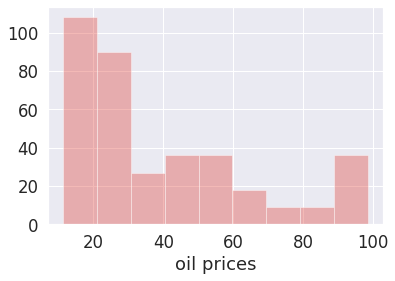

In [55]:
#Primer análisis macroeconómico de los 9 paises.
#Análisis Univariado
sns.distplot(datos_economicos['oil prices'], kde=False) 
plt.show()

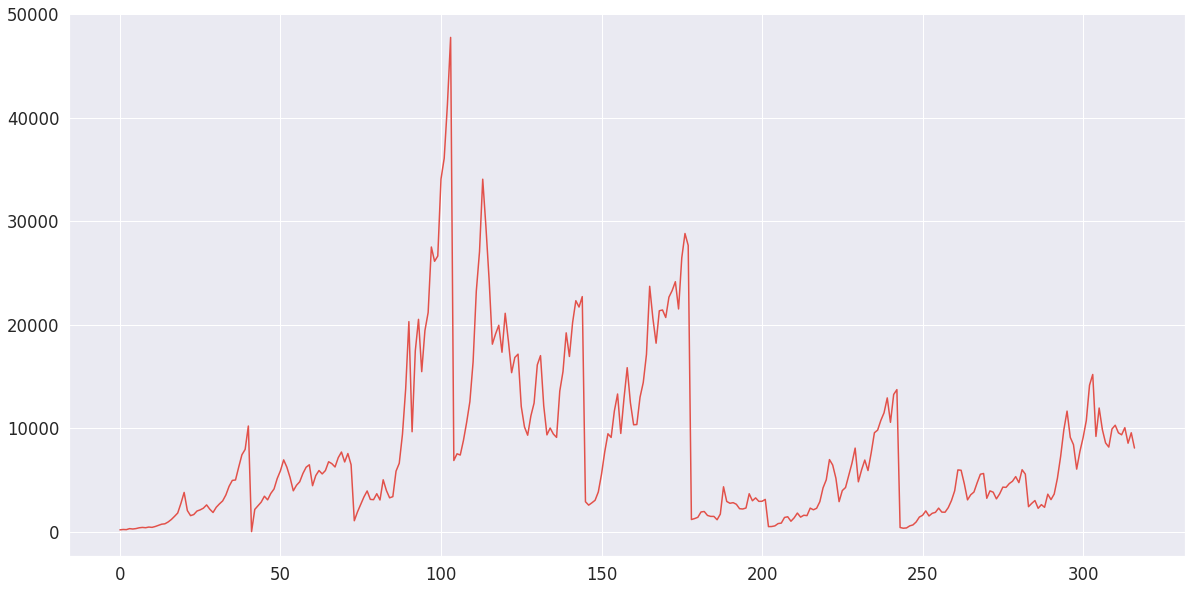

In [56]:
#Estos gráfico nos indican los movimientos en el indice al consumidor de los ultimos 40 años(1980-2020)
datos_economicos['index price']
datos_economicos["index price"].unique()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot([168.61,   203.15,   188.98,   285.43,   248.89,   290.25,
         366.97,   402.57,   374.43,   437.8 ,   409.18,   491.69,
         599.26,   715.16,   751.65,   925.19,  1164.95,  1469.49,
        1794.91,  2728.15,  3783.67,  2035.  ,  1539.73,  1647.17,
        1986.53,  2099.32,  2263.41,  2578.47,  2161.65,  1845.38,
        2349.89,  2677.44,  2965.56,  3541.29,  4375.1 ,  4945.55,
        4987.79,  6235.3 ,  7425.96,  7940.36, 10201.51,      0,
        2143.5 ,  2493.1 ,  2846.5 ,  3418.4 ,  3065.5 ,  3689.3 ,
        4118.5 ,  5135.5 ,  5882.58,  6930.2 ,  6222.46,  5217.35,
        3940.36,  4476.87,  4814.3 ,  5618.76,  6220.81,  6456.91,
        4434.17,  5412.88,  5899.94,  5572.28,  5897.81,  6749.09,
        6566.09,  6242.32,  7142.83,  7687.77,  6728.13,  7542.44,
        6460.52,  1048.29,  1908.85,  2615.37,  3346.06,  3926.9 ,
        3110.49,  3085.2 ,  3658.98,  3055.41,  5005.82,  3972.12,
        3262.33,  3377.28,  5838.96,  6602.69,  9397.93, 13786.91,
       20286.99,  9647.31, 17464.81, 20509.09, 15454.92, 19426.71,
       21170.68, 27499.42, 26117.54, 26626.46, 34056.83, 36068.33,
       41253.74, 47751.33,  6867.86,  7518.55,  7397.27,  8816.24,
       10567.53, 12557.45, 16392.74, 23232.14, 27048.26, 34050.78,
       29437.18, 24295.57, 18109.08, 19100.  , 19935.83, 17329.7 ,
       21094.61, 18397.52, 15355.99, 16823.41, 17145.01, 12093.56,
       10123.14,  9311.42, 11179.25, 12422.58, 16110.38, 17002.24,
       12165.35,  9346.11, 10006.49,  9425.42,  9102.56, 13577.87,
       15460.43, 19203.77, 16920.48, 20209.03, 22310.73, 21697.23,
       22705.02,  2884.51,  2556.72,  2781.05,  3027.13,  3829.37,
        5545.98,  7695.99,  9453.52,  9098.46, 11646.54, 13294.7 ,
        9484.47, 12859.93, 15838.33, 12446.85, 10321.22, 10346.25,
       12988.18, 14402.  , 17118.31, 23700.45, 20606.72, 18203.01,
       21336.42, 21414.34, 20686.69, 22654.24, 23287.69, 24145.21,
       21511.54, 26453.67, 28804.14, 27650.63,  1166.51,  1257.32,
        1381.49,  1897.42,  1940.96,  1561.31,  1467.88,  1467.57,
        1144.54,  1687.14,  4329.44,  2912.9 ,  2737.01,  2795.88,
        2639.19,  2211.11,  2182.52,  2279.75,  3657.4 ,  2978.14,
        3257.35,  2920.18,  2928.94,  3109.78,   480.9 ,   490.4 ,
         552.8 ,   774.  ,   820.9 ,  1366.2 ,  1432.3 ,  1000.  ,
        1327.87,  1790.37,  1398.2 ,  1578.  ,  1545.1 ,  2266.7 ,
        2106.6 ,  2253.9 ,  2888.7 ,  4224.3 ,  5002.39,  6958.14,
        6433.61,  5160.1 ,  2892.63,  3965.16,  4256.08,  5408.25,
        6596.91,  8067.31,  4810.2 ,  5957.43,  6914.19,  5898.35,
        7612.39,  9552.16,  9805.55, 10743.01, 11481.06, 12917.64,
       10558.96, 13249.01, 13718.78,   394.44,   325.88,   353.24,
         552.6 ,   643.2 ,   930.21,  1403.64,  1573.94,  2001.08,
        1509.  ,  1765.7 ,  1857.8 ,  2268.2 ,  1881.2 ,  1872.  ,
        2315.7 ,  2998.9 ,  3942.66,  5958.32,  5926.42,  4624.58,
        3063.91,  3557.9 ,  3821.16,  4715.23,  5541.75,  5614.08,
        3217.97,  3936.33,  3804.78,  3159.81,  3641.07,  4295.95,
        4272.75,  4637.06,  4862.31,  5312.56,  4730.69,  5978.06,
        5551.41,  2407.1 ,  2727.5 ,  3000.  ,  2248.8 ,  2603.3 ,
        2344.57,  3615.22,  3087.68,  3630.76,  5154.77,  7255.4 ,
        9836.6 , 11641.4 ,  9109.8 ,  8397.6 ,  6036.9 ,  7737.2 ,
        9080.8 , 10733.9 , 14146.5 , 15182.29,  9195.8 , 11940.  ,
        9859.1 ,  8566.3 ,  8167.5 ,  9916.7 , 10279.5 ,  9544.2 ,
        9352.1 , 10043.9 ,  8539.9 ,  9549.2 ,  8073.7 ])

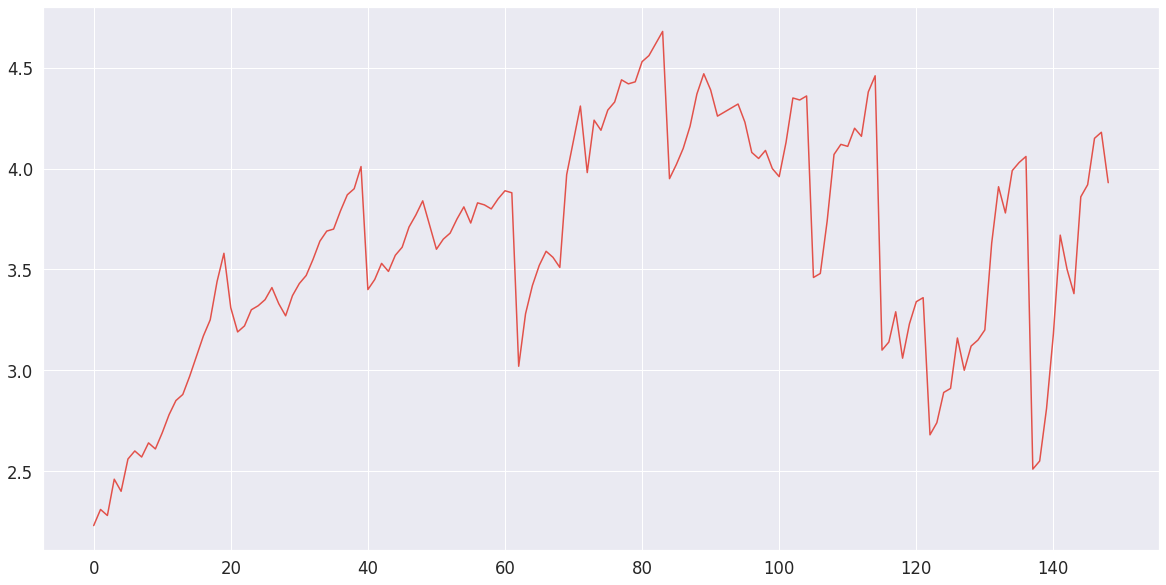

In [57]:
#Estos gráfico nos indican los movimientos en el indice al consumidor de los ultimos 40 años(1980-2020),transformados a logaritmos par ver movimientos precisos. 
datos_economicos["log_indexprice"]
datos_economicos["log_indexprice"].unique()
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot([2.23, 2.31, 2.28, 2.46, 2.4 , 2.56, 2.6 , 2.57, 2.64, 2.61, 2.69,
       2.78, 2.85, 2.88, 2.97, 3.07, 3.17, 3.25, 3.44, 3.58, 3.31, 3.19,
       3.22, 3.3 , 3.32, 3.35, 3.41, 3.33, 3.27, 3.37, 3.43, 3.47, 3.55,
       3.64, 3.69, 3.7 , 3.79, 3.87, 3.9 , 4.01, 3.4 , 3.45, 3.53, 3.49,
       3.57, 3.61, 3.71, 3.77, 3.84, 3.72, 3.6 , 3.65, 3.68, 3.75, 3.81,
       3.73, 3.83, 3.82, 3.8 , 3.85, 3.89, 3.88, 3.02, 3.28, 3.42, 3.52,
       3.59, 3.56, 3.51, 3.97, 4.14, 4.31, 3.98, 4.24, 4.19, 4.29, 4.33,
       4.44, 4.42, 4.43, 4.53, 4.56, 4.62, 4.68, 3.95, 4.02, 4.1 , 4.21,
       4.37, 4.47, 4.39, 4.26, 4.28, 4.3 , 4.32, 4.23, 4.08, 4.05, 4.09,
       4.  , 3.96, 4.13, 4.35, 4.34, 4.36, 3.46, 3.48, 3.74, 4.07, 4.12,
       4.11, 4.2 , 4.16, 4.38, 4.46, 3.1 , 3.14, 3.29, 3.06, 3.23, 3.34,
       3.36, 2.68, 2.74, 2.89, 2.91, 3.16, 3.  , 3.12, 3.15, 3.2 , 3.63,
       3.91, 3.78, 3.99, 4.03, 4.06, 2.51, 2.55, 2.81, 3.18, 3.67, 3.5 ,
       3.38, 3.86, 3.92, 4.15, 4.18, 3.93])

In [58]:
# Hacemos un describe para saber los datos estadísticos .
datos_economicos.describe().T

count     mean      std     min     25%      50%  \
year                 369.0  2,000.0     11.8 1,980.0 1,990.0  2,000.0   
index price          369.0  6,785.6  7,743.9     0.0 1,467.6  3,940.4   
log_indexprice       369.0      3.6      0.5     2.2     3.3      3.6   
inflationrate        369.0      0.0      0.0    -0.0     0.0      0.0   
oil prices           369.0     39.7     25.5    11.3    19.4     28.5   
exchange_rate        369.0     27.7     49.5     0.0     1.3      5.4   
gdppercent           369.0      0.0      0.0    -0.1     0.0      0.0   
percapitaincome      369.0 20,717.9 17,411.4    27.0 2,099.0 19,969.5   
unemploymentrate     369.0      0.1      0.0     0.0     0.0      0.1   
manufacturingoutput  369.0    247.2    558.2     0.0     0.6    101.2   
tradebalance         369.0    -15.8    153.7  -770.9   -24.1     -0.1   
USTreasury           369.0      0.1      0.0     0.0     0.0      0.1   
Hecho_historico      369.0      3.5      2.5     1.0     1.0      4.0   

                         75%      max  
year                 2,010.0  2,020.0  
index price          9,484.5 47,751.3  
log_indexprice           4.0      4.7  
inflationrate            0.1      0.2  
oil prices              57.9     98.6  
exchange_rate           13.9    249.1  
gdppercent               0.1      0.1  
percapitaincome     36,354.0 65,280.0  
unemploymentrate         0.1      0.3  
manufacturingoutput    245.8  3,868.5  
tradebalance            18.1    366.1  
USTreasury               0.1      0.1  
Hecho_historico          4.0      9.0

In [61]:
#Creación de histogramas para saber si exíste una distribución normal.
#Agrupamos  las variables a utilizar.
df_1=datos_economicos.groupby(['year','country','percapitaincome','oil prices','inflationrate','index price','tradebalance','manufacturingoutput','Hecho_historico'])['USTreasury'].count().reset_index()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbd50a8edc0>,
      dtype=object)

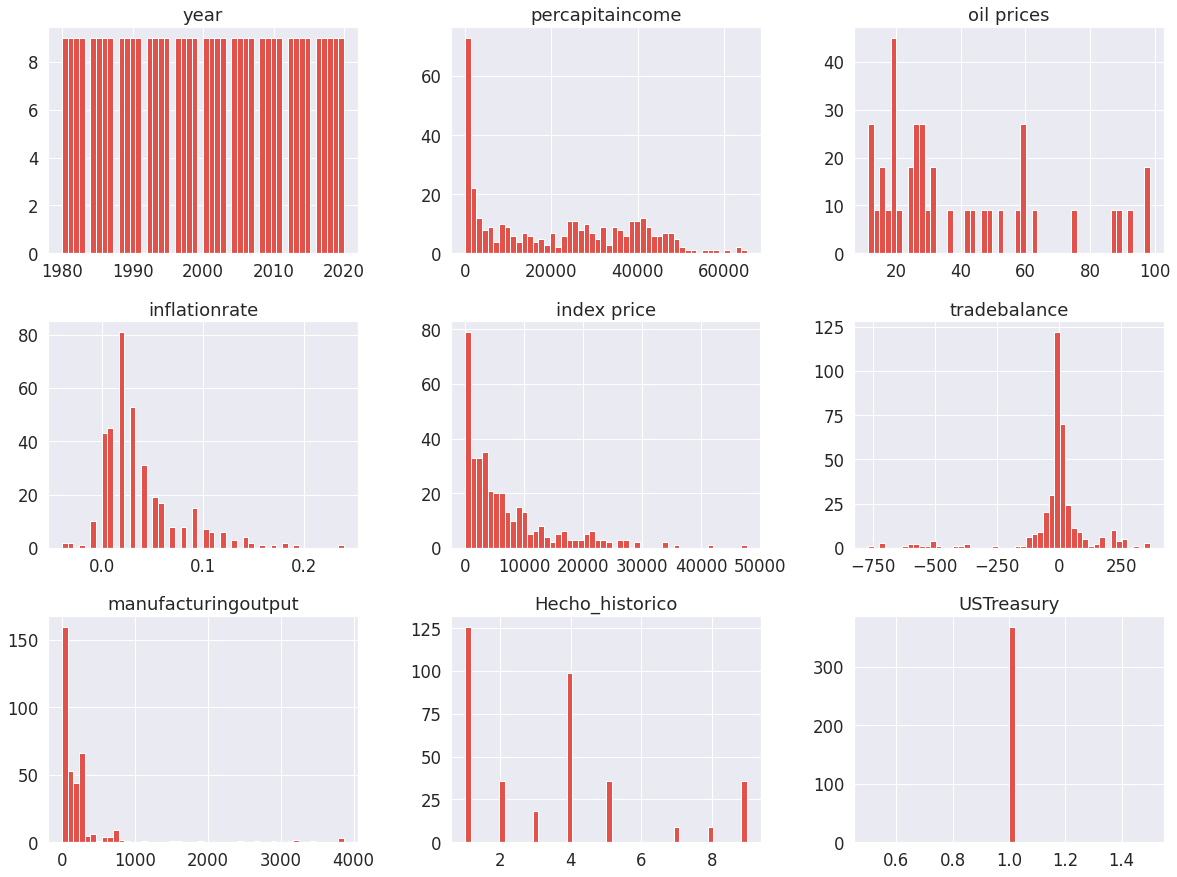

In [62]:
#Graficamos en histogramas todas las variables numericas del nuevo dataframe.
df_1.hist(bins=50, figsize=(20,15))

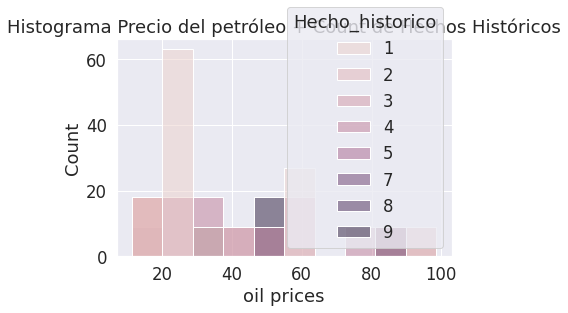

In [63]:
#Hecho histórico variable sintética.
#Corresponde a los Hechos Historicos que tuvieron lugar en los ultimos 40 años 1) GUERRA. 2) CAIDA DE MERCADOS. 3) CAIDA DE REGIMEN. 4) CAMBIO POLITICO Y MONETARIO. 5) CATASTROFE. 6) CAIDA DEL PRECIO DEL PETROLEO. 7) TRATADOS Y ACUERDOS ECONOMICOS. 8) TERRORISMO. 9) PANDDEMIA GLOBAL.
sns.histplot(data=df_1,x='oil prices',hue='Hecho_historico',) 
plt.title('Histograma Precio del petróleo + Count de Hechos Históricos')
plt.show()

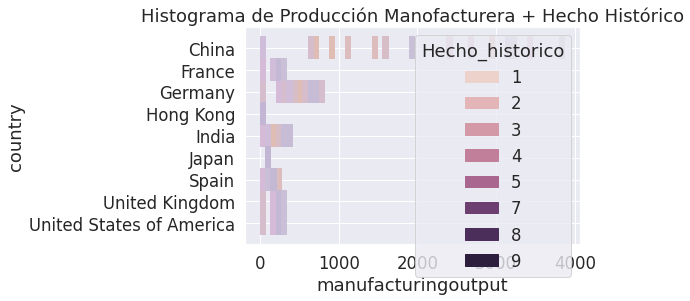

In [64]:
sns.histplot(data=df_1,x='manufacturingoutput',y='country',hue='Hecho_historico') 
plt.title('Histograma de Producción Manofacturera + Hecho Histórico')
#plt.update_traces(textposition='inside', textinfo='percent+label')
plt.show()

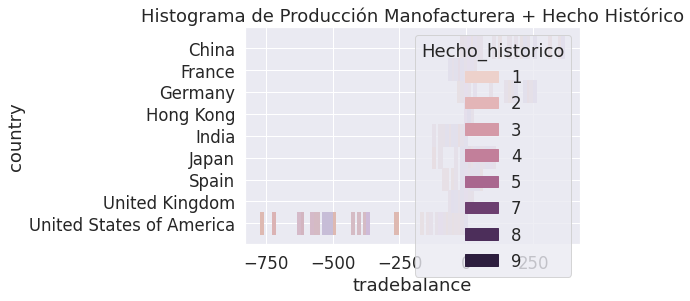

In [65]:
sns.histplot(data=df_1,x='tradebalance',y='country',hue='Hecho_historico') 
plt.title('Histograma de Producción Manofacturera + Hecho Histórico')
plt.show()

In [66]:
df_1.head(10).T

0       1        2          3      4       5      6  \
year                  1980    1980     1980       1980   1980    1980   1980   
country              China  France  Germany  Hong Kong  India   Japan  Spain   
percapitaincome      195.0 1,938.0  6,206.0    5,700.0  267.0 9,463.0   37.0   
oil prices            21.6    21.6     21.6       21.6   21.6    21.6   21.6   
inflationrate          0.0     0.1      0.1        0.0    0.1     0.1    0.2   
index price            0.0   394.4    480.9        0.0    0.0 6,867.9    0.0   
tradebalance          -1.1    -1.6    -22.4       -0.1   -5.8   -10.8   -0.0   
manufacturingoutput    0.0    19.8      0.0        0.0   31.2    71.0    0.0   
Hecho_historico          1       1        1          1      1       1      1   
USTreasury               1       1        1          1      1       1      1   

                                  7                         8      9  
year                           1980                      1980   1981  
country              United Kingdom  United States of America  China  
percapitaincome            10,032.0                  12,575.0  197.0  
oil prices                     21.6                      21.6   31.8  
inflationrate                   0.2                       0.1    0.0  
index price                     0.0                     168.6    0.0  
tradebalance                   12.3                     -13.1    0.0  
manufacturingoutput             0.0                       0.0    0.0  
Hecho_historico                   1                         1      4  
USTreasury                        1                         1      1

In [67]:
#Inflación acumulada de los ultimos 40 años.
df_frecu=df_1[['country','inflationrate']]
pie_borough = df_frecu.groupby('country').sum('count')*100
pie_borough=pie_borough.rename(columns={'percapitaincome': 'Promedio_Salarios'})
pie_borough.T

country        China  France  Germany  Hong Kong  India  Japan  Spain  \
inflationrate  170.0   123.0     84.0      158.0  318.0   40.0  189.0   

country        United Kingdom  United States of America  
inflationrate           149.0                     130.0

In [68]:
fig = px.pie(pie_borough, values='inflationrate', \
             names=pie_borough.index, title='inflationrate')
fig.update_traces(textposition='inside', textinfo='value+label')
fig.show()

In [69]:
#Promedio de Salarios Por País.
df_frecu=df_1[['country','percapitaincome']]
pie_borough = df_frecu.groupby('country').median('count')
pie_borough=pie_borough.rename(columns={'percapitaincome': 'Promedio_Salarios'})
pie_borough.T

country            China   France  Germany  Hong Kong  India    Japan  \
Promedio_Salarios  959.0 22,453.0 23,695.0   25,092.0  443.0 35,275.0   

country              Spain  United Kingdom  United States of America  
Promedio_Salarios 15,369.0        28,238.0                  36,335.0

In [70]:
fig = px.pie(pie_borough, values='Promedio_Salarios', \
             names=pie_borough.index, title='Promedio Per cápita a nivel Mundial')
fig.update_traces(textposition='inside', textinfo='value + label+ percent')
fig.show()

In [71]:
#Agrupamos en un nuevo DataFrame df_2 y analizamos los hechos historicos reemplazandolos por strings.
#Agrupamos  las variables a utilizar.
df_2=df_1.groupby(['year','country','percapitaincome','oil prices','inflationrate','index price','tradebalance','manufacturingoutput','Hecho_historico'])['USTreasury'].count().reset_index()
df_2 ["Hecho_historico"].unique()
#Reemplazamos mediante un diccionario.
valores_Hechos_Historicos= {"Hecho_historico":{1: 'Guerra', 4:'Político y Monetario', 1:'Guerra', 1: 'Guerra', 1: 'Guerra',
       4: 'Político y Monetario', 6: 'Caída del petróleo', 2: 'Caída de Mercados', 1: 'Guerra', 7: 'Tratados y Acuerdos', 1: 'Guerra', 2: 'Caída de Mercados', 3: 'Caída de Régimen', 4: 'Político y Monetario', 7:'Tratados y Acuerdos', 5:'Catástrofe', 1: 'Guerra', 4: 'Político y Monetario', 1: 'Guerra' , 6: 'Caída del Petróleo', 4: 'Político y Monetario', 8:'Terrorismo', 4:'Político y Monetario' , 1: 'Guerra', 5: 'Catástrofe', 1: 'Guerra', 1: 'Guerra', 2: 'Caída de Mercados', 2:'Caída de Mercados', 4: 'Político y Monetario', 9: 'Pandemia Global', 5: 'Catástrofe',4: 'Político y Monetario', 1: 'Guerra',1: 'Guerra' , 9: 'Pandemia Global', 9: 'Pandemia Global', 4: 'Político y Monetario',4: 'Político y Monetario', 4: 'Político y Monetario',9: 'Pandemia Global',}}
df_2.replace(valores_Hechos_Historicos, inplace=True)
df_2

year                   country  percapitaincome  oil prices  \
0    1980                     China            195.0        21.6   
1    1980                    France          1,938.0        21.6   
2    1980                   Germany          6,206.0        21.6   
3    1980                 Hong Kong          5,700.0        21.6   
4    1980                     India            267.0        21.6   
..    ...                       ...              ...         ...   
364  2020                     India          1,901.0        47.0   
365  2020                     Japan         19,969.5        47.0   
366  2020                     Spain         27,057.0        47.0   
367  2020            United Kingdom         40,285.0        47.0   
368  2020  United States of America         63,544.0        47.0   

     inflationrate  index price  tradebalance  manufacturingoutput  \
0              0.0          0.0          -1.1                  0.0   
1              0.1        394.4          -1.6                 19.8   
2              0.1        480.9         -22.4                  0.0   
3              0.0          0.0          -0.1                  0.0   
4              0.1          0.0          -5.8                 31.2   
..             ...          ...           ...                  ...   
364            0.1     47,751.3          -8.3                340.0   
365            0.0     22,705.0           0.0                 90.9   
366            0.0      8,073.7          19.1                143.1   
367            0.0      6,460.5          -9.7                227.1   
368            0.0     10,201.5           0.0                227.1   

     Hecho_historico  USTreasury  
0             Guerra           1  
1             Guerra           1  
2             Guerra           1  
3             Guerra           1  
4             Guerra           1  
..               ...         ...  
364  Pandemia Global           1  
365  Pandemia Global           1  
366  Pandemia Global           1  
367  Pandemia Global           1  
368  Pandemia Global           1  

[369 rows x 10 columns]

In [72]:
#Maximo de precios según el Hecho Histórico y cuanto influye en el precio del petróleo.
df_H=df_2[['Hecho_historico','oil prices']]
pie_borough1 = df_H.groupby('Hecho_historico').max()
pie_borough1=pie_borough1.rename(columns={'Hecho_historico': 'Hechos_Historicos'})
pie_borough1.head(100).T

Hecho_historico  Catástrofe  Caída de Mercados  Caída de Régimen  Guerra  \
oil prices             98.6               91.7              19.4    97.6   

Hecho_historico  Pandemia Global  Político y Monetario  Terrorismo  \
oil prices                  89.2                  87.9        19.4   

Hecho_historico  Tratados y Acuerdos  
oil prices                      17.2

In [73]:
pie_borough1

oil prices
Hecho_historico                 
Catástrofe                  98.6
Caída de Mercados           91.7
Caída de Régimen            19.4
Guerra                      97.6
Pandemia Global             89.2
Político y Monetario        87.9
Terrorismo                  19.4
Tratados y Acuerdos         17.2

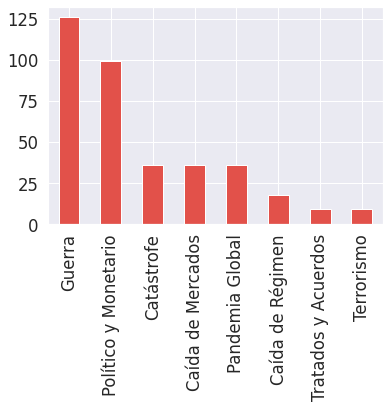

In [74]:
#Cantidad de eventos por Hecho_historico.
df_2.Hecho_historico.value_counts().plot(kind='bar')

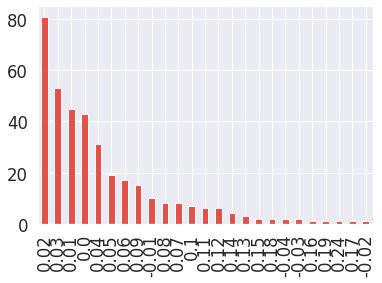

In [75]:
#Cantidad de veces que la inflación estuvo en un determinado valor durante los últimos 40 años.
df_2.inflationrate.value_counts().plot(kind='bar')

In [76]:
#Evolución del índice Per capita he índice de Precios.
fig= px.bar(datos_economicos, x='year', y='percapitaincome',
           color='index price',
            template= 'plotly_white',
           labels={'count': 'Percapita','Precio de acciones':'Cantidad'},
            height=400)
fig.show()

In [77]:
#Inflación.
fig= px.bar(datos_economicos, x='country', y='inflationrate',
           color='year',
            template= 'plotly_dark',
           labels={'inflationrate': 'Inflacion Historica','country':'Paises'},
           title='Historico inflacionario determina el precio de comodities',
            height=700)
fig.show()

In [78]:
#Índice Per Capita.
fig= px.bar(datos_economicos, x='country', y='percapitaincome',
           color='year',
           template= 'plotly_dark',
           labels={'percapitaincome': 'Per Capita','country':'Paises'},
           title='Per Capita de los 9 paises Max:EEUU(2019=65280),Min:Spain(1980=37)',
            height=400)
fig.show()

In [79]:
#Evolución del Precio del Petróleo.
fig= px.bar(datos_economicos, x='year', y='oil prices',
           color='country',
            template= 'plotly_dark',
           labels={'oil prices': 'Precio del Petroleo','year':'Años'},
           title='El Historico  nos muestra dos maximos en los precios del petroleo(2011,2013) usd (98,56)(97.63), mientras que el minimo fue en el año (1986,1998) usd (12.51)(11.35)',
            height=600)
fig.show()

In [80]:
#Precios del consumo(Familias).
fig= px.bar(datos_economicos, x='country', y='index price',
           color='year',
            template= 'plotly_dark',
           labels={'stock index': 'Precio Historico de las acciones','index price':'Acciones mas importantes'},
           title='Historico Mercado de Valores a nivel Mundial',
            height=500)
fig.show()

In [81]:
#Balanza Comercial- Relación entre las Importaciones y las exportaciones.
fig= px.bar(datos_economicos, x='country', y='tradebalance',
           color='year',
            template= 'plotly_dark',
           labels={'year': 'Años','tradebalance':'Balanza comercial'},
           title='Comportamiento de los Paises con respecto a su balanza comercial (EEUU lidera el déficit comercial)millones',
            height=500)
fig.show()

In [82]:
#Producción Manofactura/mes
fig= px.bar(datos_economicos, x='country', y='manufacturingoutput',
           color='year',
           template= 'plotly_dark',
           labels={'manufacturingoutput': 'Manofactura','country':'Paises'},
           title='Produccion Manofactura a nivel global Max:China(2020=3853.81 millones))',
            height=400)
fig.show()

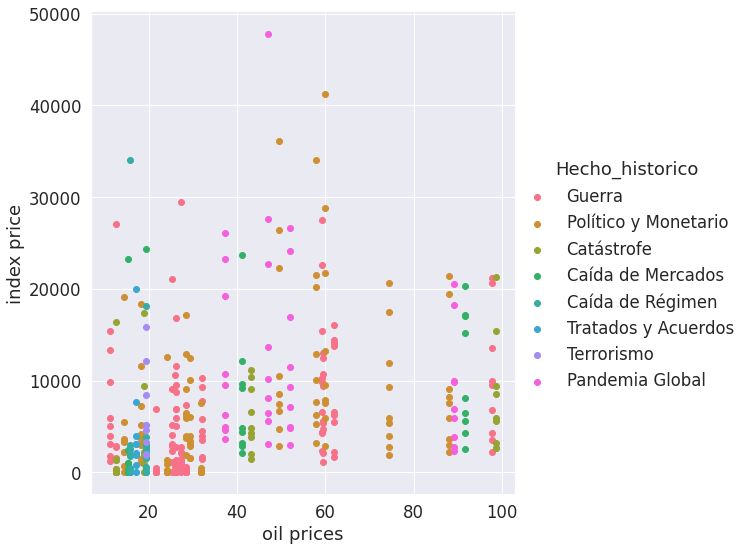

In [83]:
#Análisis Multivariado del Petroéo, Precio al consumidor y Hecho Historico.
#Vemos que los outliers por alto consumo y precio del petróleo promedio, corresponde a un hecho bélico y otro a un proceso político monetario , mientras que el mayor precio del petróleo se da en hechos bélicos-político y monetario en el transcurso de los últimos 40 años.
#FacetGrid
sns.FacetGrid(df_2,hue = 'Hecho_historico' , size = 8).map(plt.scatter,'oil prices','index price').add_legend();
plt.show()

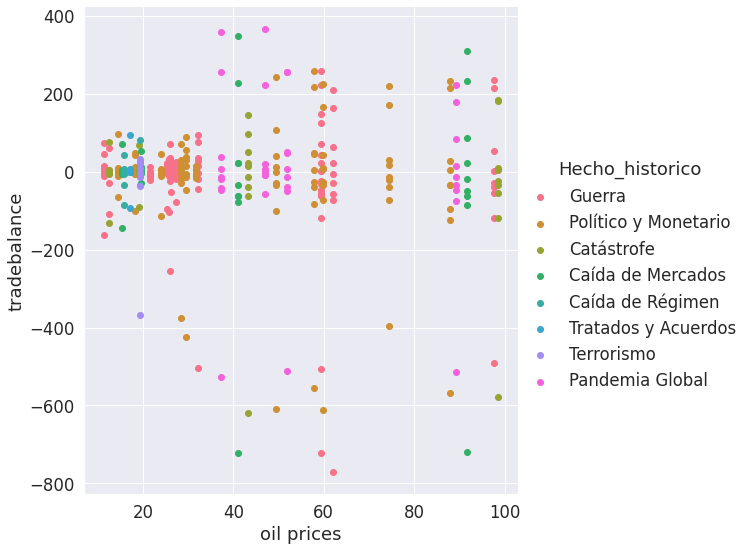

In [84]:
#Análisis Multivariado Precio del Petróleo, Balanza comercial y los Hechos Históricos.
#Respecto a la balanza comercial se nota que la mayor cantidad de eventos vs mayor precio del petróleo corresponde a caidas de mercados, seguido de eventos bélicos.
#FacetGrid
sns.FacetGrid(df_2,hue = 'Hecho_historico' , size = 8).map(plt.scatter,'oil prices','tradebalance').add_legend();
plt.show()

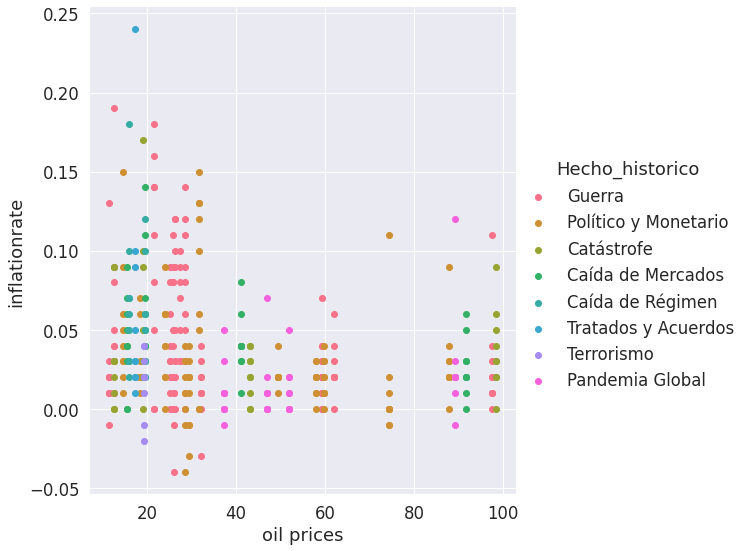

In [85]:
#Análisis Multivariado Precio del Petróleo,inflacíón y los Hechos Históricos.
#Vemos que  uno de los patrones mas altos que corresponden a muy alta inflación se da con un precio muy bajo del petróleo y los valores mas altos del petróleo corresponden catástrofes .
#FacetGrid
sns.FacetGrid(df_2,hue = 'Hecho_historico' , size = 8).map(plt.scatter,'oil prices','inflationrate').add_legend();
plt.show()

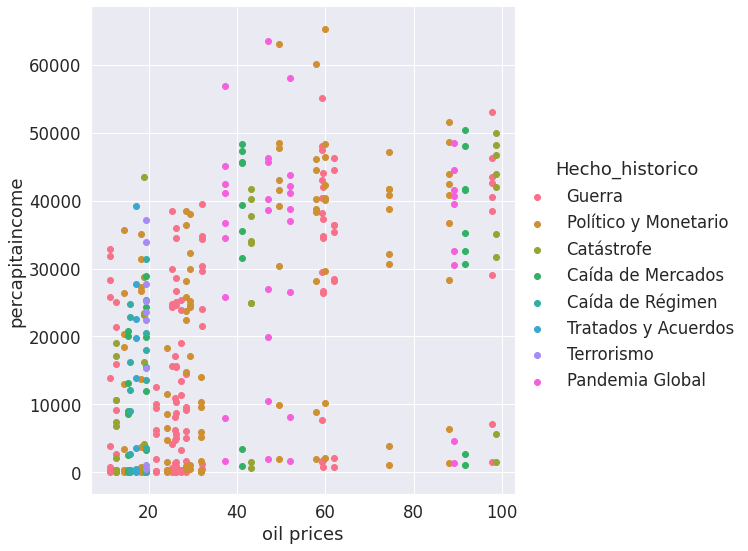

In [86]:
#Análisis Multivariado Precio del Petróleo,Per capita y los Hechos Históricos.
#Aqui vemos que uno de los valores mas altos per capita y precio promedio del petróleo corresponde a hechos bélicos y cambios políticos y monetarios,como asi también  mayor precio del petróleo.
#FacetGrid
sns.FacetGrid(df_2,hue = 'Hecho_historico' , size = 8).map(plt.scatter,'oil prices','percapitaincome').add_legend();
plt.show()

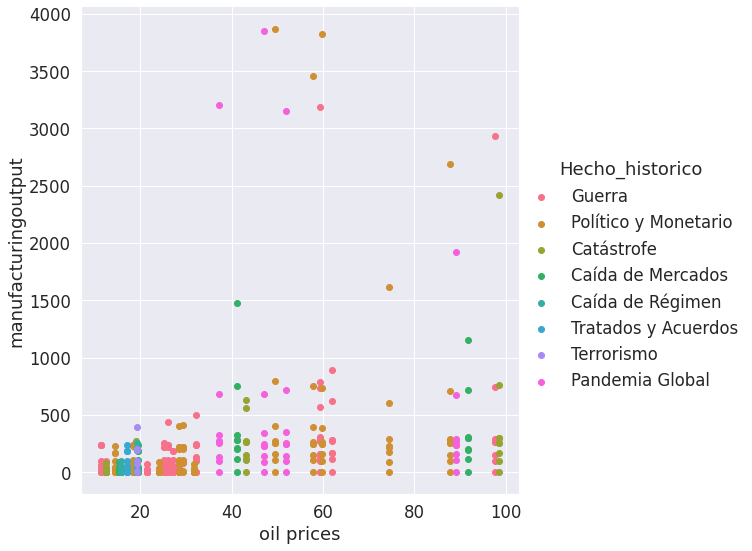

In [87]:
#Análisis Multivariado Precio del Petróleo,manofactura y los Hechos Históricos.
#En el caso de la manofactura también se ve que los altos niveles de producción corresponden a hechos bélicos, cambios políticos y monetarios y a mayor precio del petróleo predomina los hechos bélicos y y las catástrofes.
#FacetGrid
sns.FacetGrid(df_2,hue = 'Hecho_historico' , size = 8).map(plt.scatter,'oil prices','manufacturingoutput').add_legend();
plt.show()

In [88]:
df_2.head(10).T

0       1        2          3       4       5  \
year                   1980    1980     1980       1980    1980    1980   
country               China  France  Germany  Hong Kong   India   Japan   
percapitaincome       195.0 1,938.0  6,206.0    5,700.0   267.0 9,463.0   
oil prices             21.6    21.6     21.6       21.6    21.6    21.6   
inflationrate           0.0     0.1      0.1        0.0     0.1     0.1   
index price             0.0   394.4    480.9        0.0     0.0 6,867.9   
tradebalance           -1.1    -1.6    -22.4       -0.1    -5.8   -10.8   
manufacturingoutput     0.0    19.8      0.0        0.0    31.2    71.0   
Hecho_historico      Guerra  Guerra   Guerra     Guerra  Guerra  Guerra   
USTreasury                1       1        1          1       1       1   

                          6               7                         8  \
year                   1980            1980                      1980   
country               Spain  United Kingdom  United States of America   
percapitaincome        37.0        10,032.0                  12,575.0   
oil prices             21.6            21.6                      21.6   
inflationrate           0.2             0.2                       0.1   
index price             0.0             0.0                     168.6   
tradebalance           -0.0            12.3                     -13.1   
manufacturingoutput     0.0             0.0                       0.0   
Hecho_historico      Guerra          Guerra                    Guerra   
USTreasury                1               1                         1   

                                        9  
year                                 1981  
country                             China  
percapitaincome                     197.0  
oil prices                           31.8  
inflationrate                         0.0  
index price                           0.0  
tradebalance                          0.0  
manufacturingoutput                   0.0  
Hecho_historico      Político y Monetario  
USTreasury                              1

<Figure size 720x480 with 0 Axes>

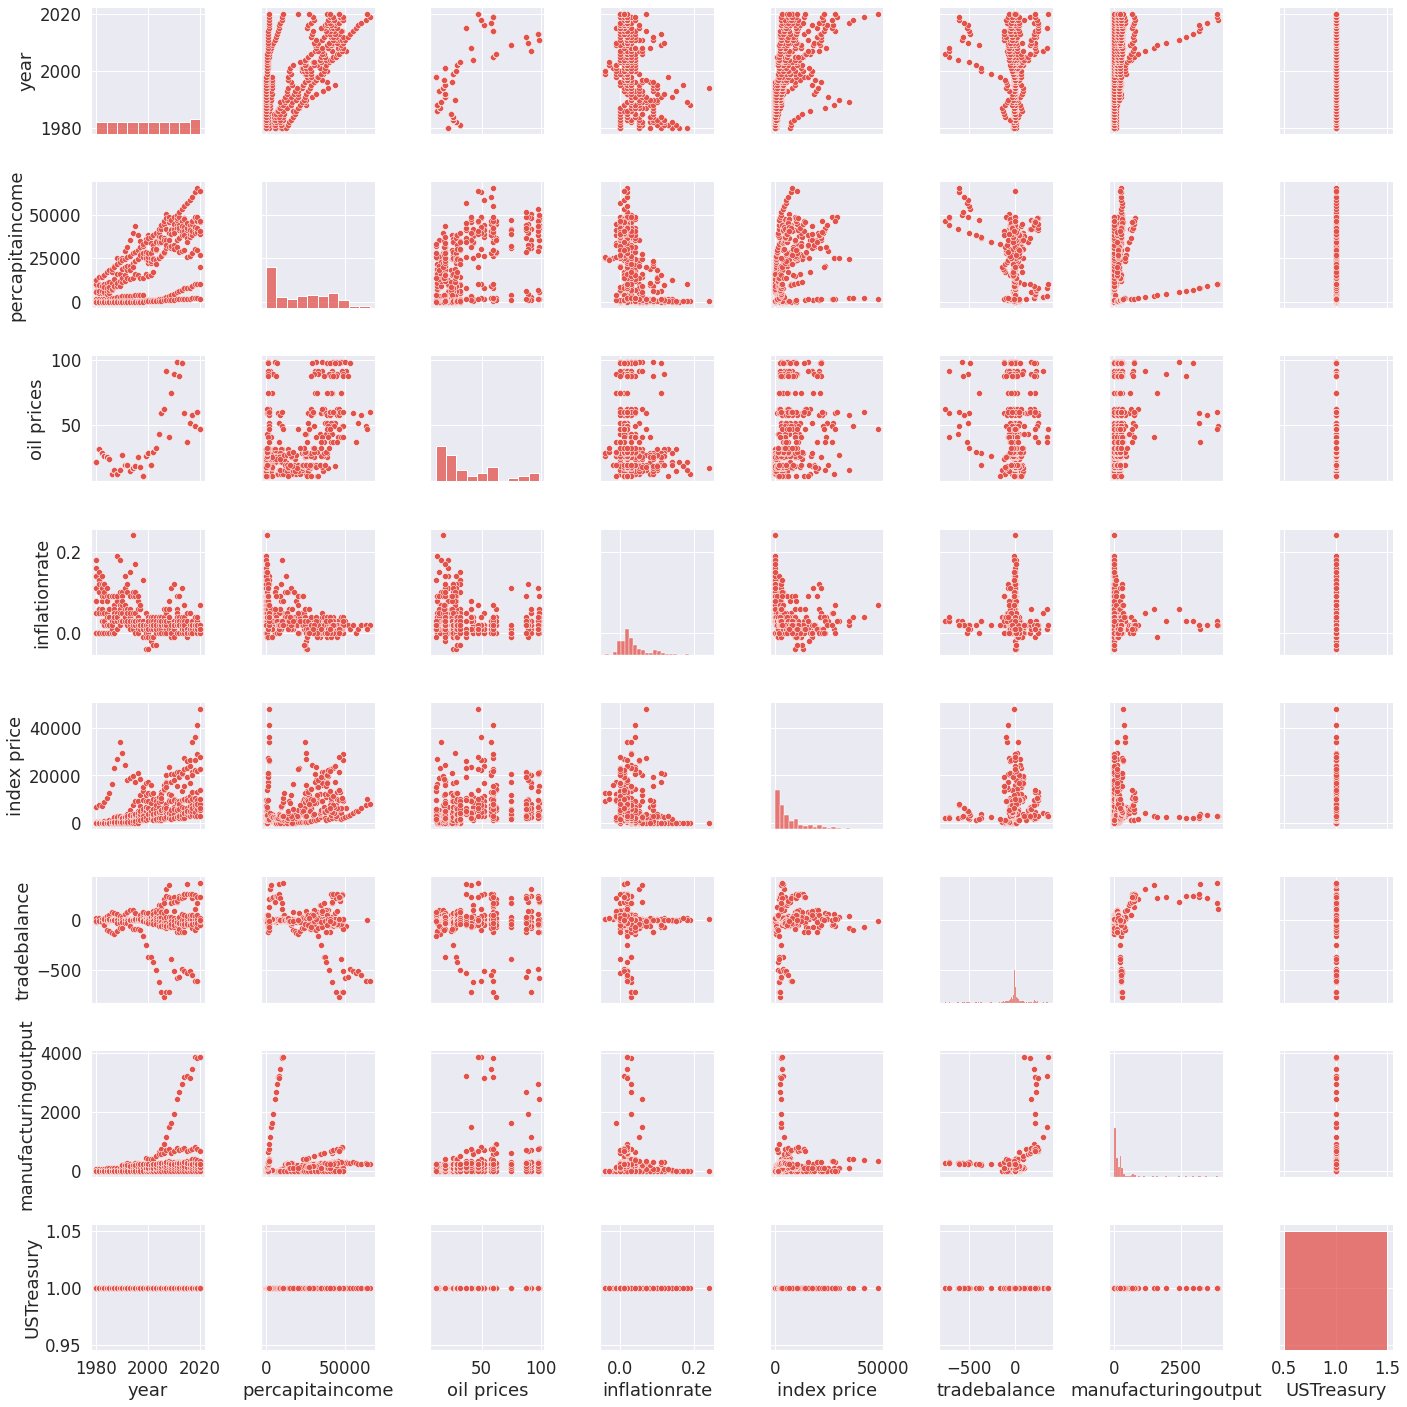

In [89]:
#Creamos un Pairplot del dataset
plt.figure(dpi=120)
sns.pairplot(df_2)
plt.show()

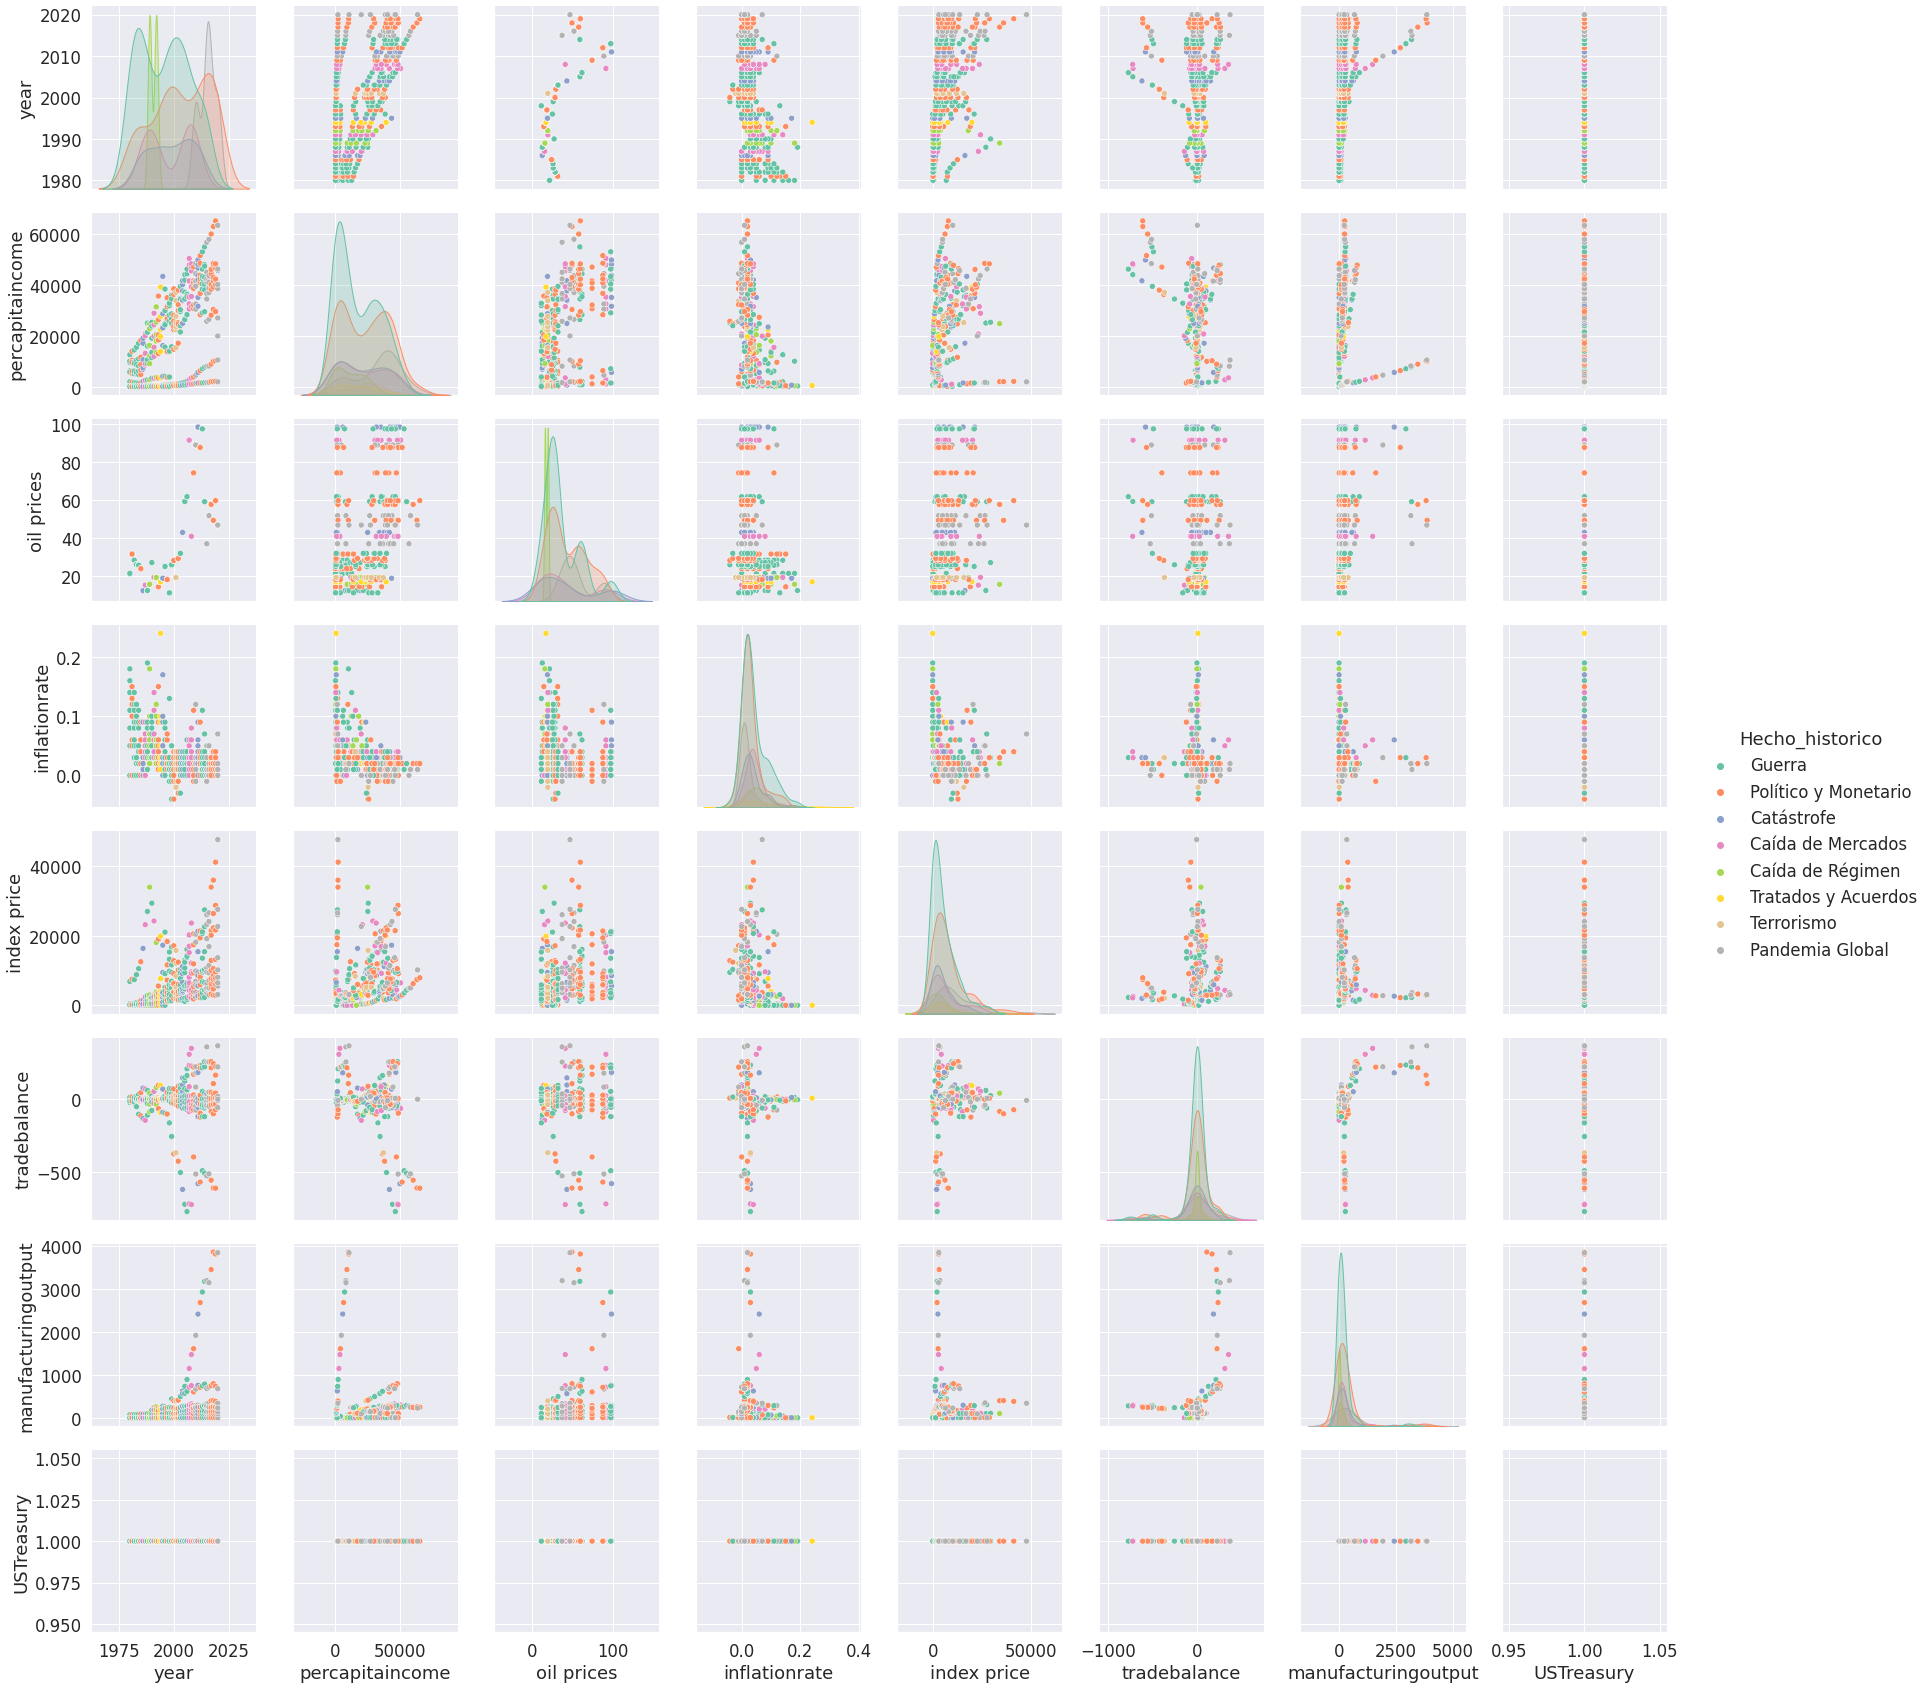

In [90]:
#Pairplot
sns.pairplot(df_2,hue = 'Hecho_historico' , size = 3, palette = 'Set2')

In [91]:
#Correlación de Variables Económicas,Análisis Multivariado.
datos_economicos.corr()

year  index price  log_indexprice  inflationrate  \
year                  1.0          0.5             0.6           -0.4   
index price           0.5          1.0             0.8           -0.2   
log_indexprice        0.6          0.8             1.0           -0.3   
inflationrate        -0.4         -0.2            -0.3            1.0   
oil prices            0.7          0.3             0.4           -0.2   
exchange_rate        -0.2          0.4             0.4            0.0   
gdppercent           -0.3         -0.2            -0.3            0.2   
percapitaincome       0.6          0.3             0.4           -0.5   
unemploymentrate      0.2         -0.1             0.0           -0.2   
manufacturingoutput   0.4         -0.0             0.0           -0.1   
tradebalance         -0.0          0.1             0.1           -0.0   
USTreasury           -0.9         -0.5            -0.6            0.4   
Hecho_historico       0.4          0.2             0.2           -0.2   

                     oil prices  exchange_rate  gdppercent  percapitaincome  \
year                        0.7           -0.2        -0.3              0.6   
index price                 0.3            0.4        -0.2              0.3   
log_indexprice              0.4            0.4        -0.3              0.4   
inflationrate              -0.2            0.0         0.2             -0.5   
oil prices                  1.0           -0.1        -0.2              0.5   
exchange_rate              -0.1            1.0        -0.1             -0.1   
gdppercent                 -0.2           -0.1         1.0             -0.5   
percapitaincome             0.5           -0.1        -0.5              1.0   
unemploymentrate            0.1           -0.1        -0.3              0.0   
manufacturingoutput         0.3           -0.1         0.1              0.0   
tradebalance               -0.1            0.1         0.1             -0.3   
USTreasury                 -0.6            0.2         0.3             -0.6   
Hecho_historico             0.1           -0.1        -0.2              0.2   

                     unemploymentrate  manufacturingoutput  tradebalance  \
year                              0.2                  0.4          -0.0   
index price                      -0.1                 -0.0           0.1   
log_indexprice                    0.0                  0.0           0.1   
inflationrate                    -0.2                 -0.1          -0.0   
oil prices                        0.1                  0.3          -0.1   
exchange_rate                    -0.1                 -0.1           0.1   
gdppercent                       -0.3                  0.1           0.1   
percapitaincome                   0.0                  0.0          -0.3   
unemploymentrate                  1.0                 -0.0           0.0   
manufacturingoutput              -0.0                  1.0           0.3   
tradebalance                      0.0                  0.3           1.0   
USTreasury                       -0.2                 -0.3           0.0   
Hecho_historico                   0.1                  0.2           0.0   

                     USTreasury  Hecho_historico  
year                       -0.9              0.4  
index price                -0.5              0.2  
log_indexprice             -0.6              0.2  
inflationrate               0.4             -0.2  
oil prices                 -0.6              0.1  
exchange_rate               0.2             -0.1  
gdppercent                  0.3             -0.2  
percapitaincome            -0.6              0.2  
unemploymentrate           -0.2              0.1  
manufacturingoutput        -0.3              0.2  
tradebalance                0.0              0.0  
USTreasury                  1.0             -0.4  
Hecho_historico            -0.4              1.0

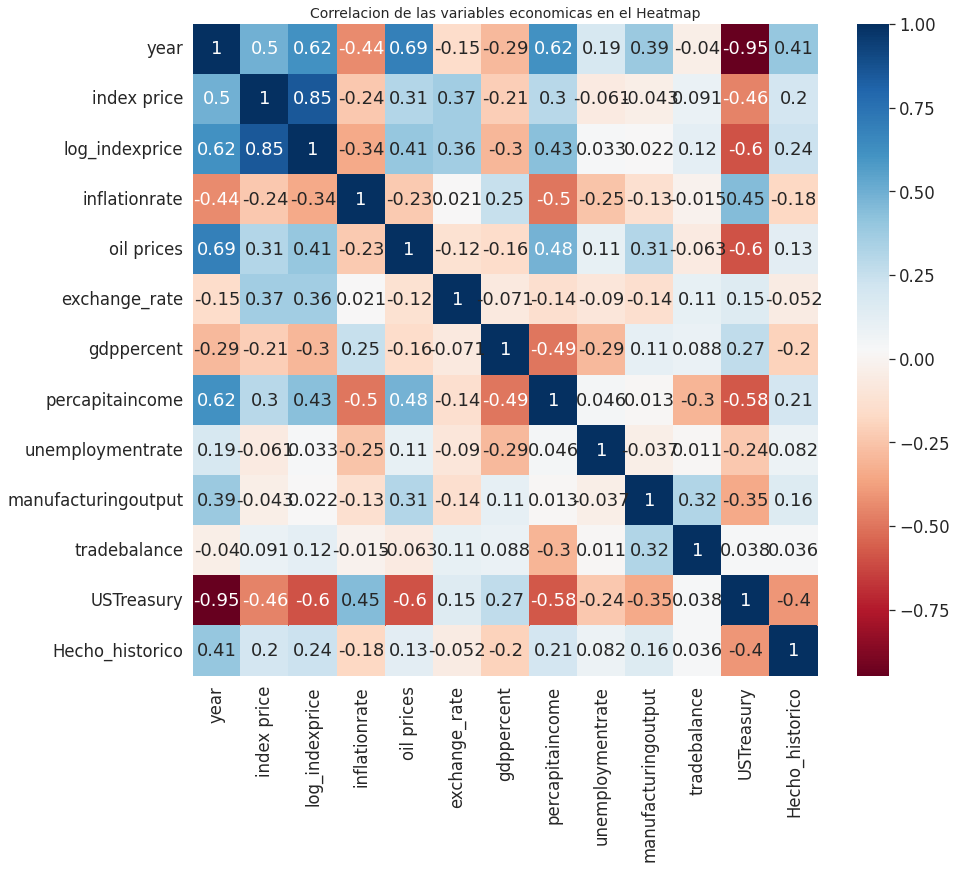

In [92]:
#Vemos cuales de las variables se correlacionan mas que otras para la posterior eliminación.
plt.figure(figsize=(14,12))
sns.heatmap(datos_economicos.corr(),annot=True, cmap='RdBu')
plt.title('Correlacion de las variables economicas en el Heatmap', fontsize=14)
plt.yticks(rotation=0)
plt.show()

In [93]:
#Correlación del nuevo DataFrame concatenado.
result_Total.corr()

index price  inflationrate  oil prices  exchange_rate  \
index price                  1.0           -0.3         0.2            0.3   
inflationrate               -0.3            1.0        -0.1            0.1   
oil prices                   0.2           -0.1         1.0            0.1   
exchange_rate                0.3            0.1         0.1            1.0   
gdppercent                  -0.2            0.3        -0.1           -0.0   
percapitaincome              0.3           -0.5         0.4           -0.1   
unemploymentrate            -0.1           -0.2         0.1           -0.0   
manufacturingoutput          0.0           -0.2         0.0           -0.3   
tradebalance                 0.1           -0.1        -0.4           -0.2   
Hecho_historico              0.0            0.0         0.5            0.3   
Close                        0.0           -0.0        -0.0           -0.0   
Volume                      -0.0            0.0         0.0            0.0   

                     gdppercent  percapitaincome  unemploymentrate  \
index price                -0.2              0.3              -0.1   
inflationrate               0.3             -0.5              -0.2   
oil prices                 -0.1              0.4               0.1   
exchange_rate              -0.0             -0.1              -0.0   
gdppercent                  1.0             -0.5              -0.3   
percapitaincome            -0.5              1.0               0.0   
unemploymentrate           -0.3              0.0               1.0   
manufacturingoutput         0.0             -0.0              -0.1   
tradebalance               -0.0             -0.2              -0.1   
Hecho_historico            -0.0              0.2               0.1   
Close                      -0.0             -0.0              -0.0   
Volume                      0.0              0.0               0.0   

                     manufacturingoutput  tradebalance  Hecho_historico  \
index price                          0.0           0.1              0.0   
inflationrate                       -0.2          -0.1              0.0   
oil prices                           0.0          -0.4              0.5   
exchange_rate                       -0.3          -0.2              0.3   
gdppercent                           0.0          -0.0             -0.0   
percapitaincome                     -0.0          -0.2              0.2   
unemploymentrate                    -0.1          -0.1              0.1   
manufacturingoutput                  1.0           0.5             -0.3   
tradebalance                         0.5           1.0             -0.6   
Hecho_historico                     -0.3          -0.6              1.0   
Close                                0.0           0.0             -0.0   
Volume                              -0.0          -0.0              0.0   

                     Close  Volume  
index price            0.0    -0.0  
inflationrate         -0.0     0.0  
oil prices            -0.0     0.0  
exchange_rate         -0.0     0.0  
gdppercent            -0.0     0.0  
percapitaincome       -0.0     0.0  
unemploymentrate      -0.0     0.0  
manufacturingoutput    0.0    -0.0  
tradebalance           0.0    -0.0  
Hecho_historico       -0.0     0.0  
Close                  1.0     0.1  
Volume                 0.1     1.0

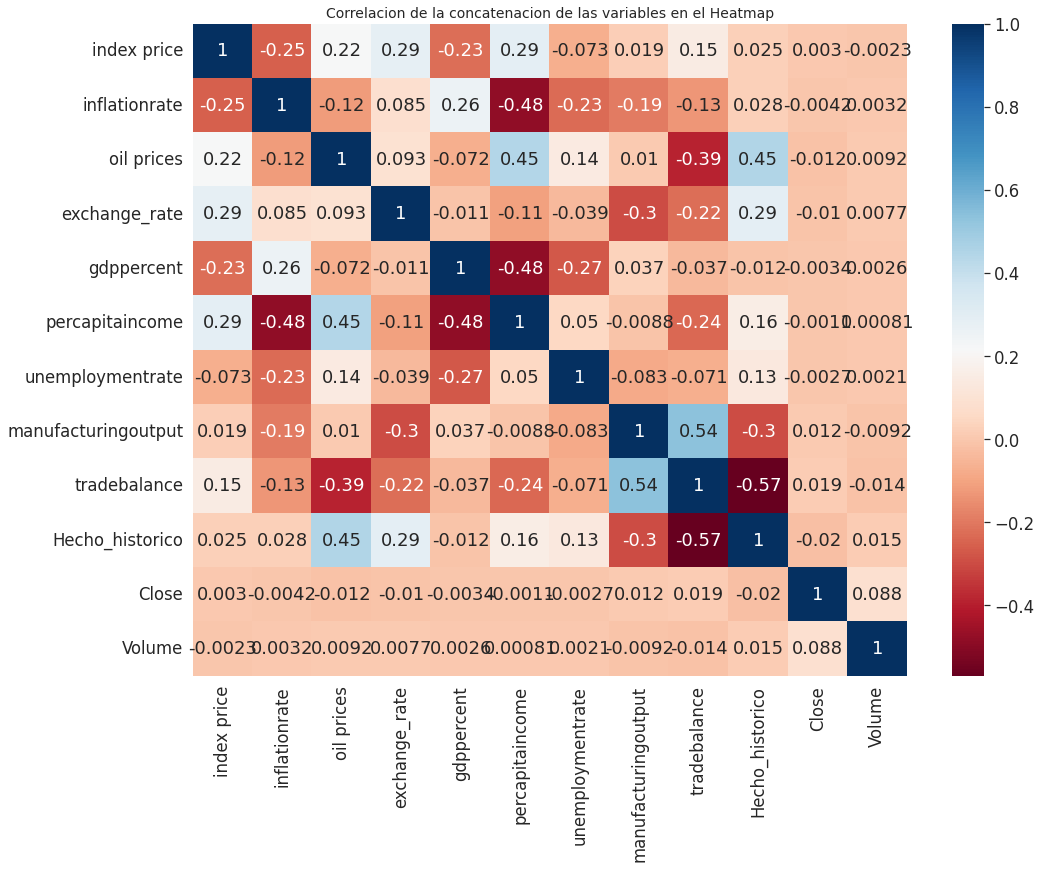

In [94]:
#Heatmap, concatenación de los dos dataset.
plt.figure(figsize=(16,12))
sns.heatmap(result_Total.corr(),annot=True, cmap='RdBu')
plt.title('Correlacion de la concatenacion de las variables en el Heatmap', fontsize=14)
plt.yticks(rotation=0)
plt.show()

Al explorar la heatmap vemos que las correlaciones por encima del 40% corresponden al precio del del petróleo con el índice per cápita y el hecho_histórico y por encima del 50% la manofactura con la balanza comercial, también notamos que las variables incorporadas 'Close' y 'Volume' tienen correlación negativa con respecto a las variables del primer dataset.

In [130]:
#Nos quedamos con 12 variables en el df result_total
result_Total.head(1)

index price  inflationrate  oil prices  exchange_rate  gdppercent  \
year                                                                         
1,980.0        168.6            0.1        21.6            1.0         0.1   

         percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
year                                                                            
1,980.0            12575               0.1                  0.0         -13.1   

         Hecho_historico  Close  Volume  
year                                     
1,980.0              1.0   61.0  320000

In [277]:
!pip install colorspacious

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


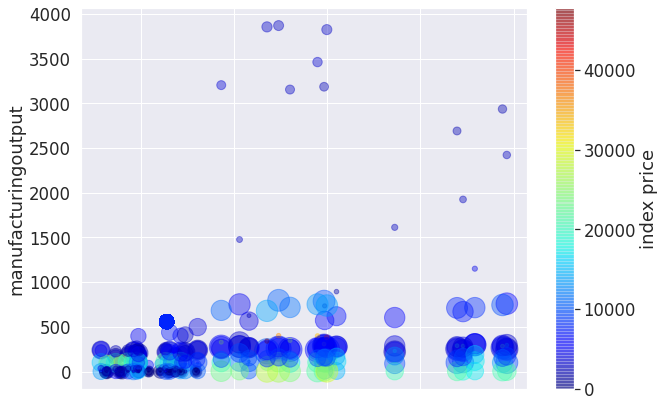

In [98]:
#Vemos una mayor densidad por debajo de 35 USD dolares. Se observa que a precios promedios del petróleo aumenta los niveles de producción.
result_Total.plot(kind='scatter', x='oil prices',alpha=0.4, y='manufacturingoutput', figsize=(10,7),
                 s=result_Total['percapitaincome']/100, c='index price',cmap=plt.get_cmap('jet'),colorbar=True)

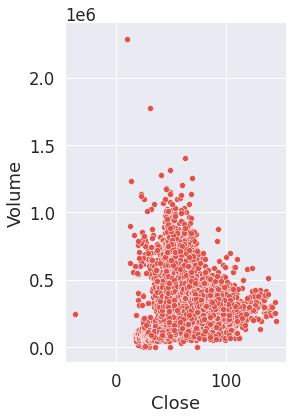

In [99]:
#Vemos la relacion con las variables independiente,calificaciones de lista, de los nuevos datos incorporados.
p = sns.pairplot(result_Total, x_vars=['Close'], y_vars='Volume', size=6, aspect=0.7)

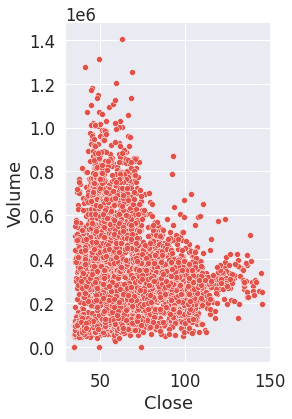

In [100]:
#para poder ver todos los datos menos outliers. modificamos un cierre de precio mayor a 30 USD.
df_nuevo1= result_Total.query('Close>35')
#Vemos la relacion con las variables independiente, y notamos que a menor volumen de petroleo mayor es precio.
p = sns.pairplot(df_nuevo1, x_vars=['Close'], y_vars='Volume', size=6, aspect=0.7)

In [131]:
#De este análisis surgen dos variables Close y Volume para incorporar a nuestro modelo, para sumar a un futuro análisis mas completo .
#Escalamiento,Normalización y Estandarización para no utilizar los outliers.
#Agrupamos  las variables a utilizar.
df_agrup=result_Total.groupby(['Close','Volume'])['Hecho_historico'].count().reset_index()
df_agrup

Close   Volume  Hecho_historico
0     -37.6   247947                1
1      10.0  2288230                1
2      12.3   897087                1
3      12.8   623201                1
4      13.8  1235218                1
...     ...      ...              ...
5627  141.6   294339                1
5628  143.6   253397                1
5629  145.1   334940                1
5630  145.2   252605                1
5631  145.3   193841                1

[5632 rows x 3 columns]

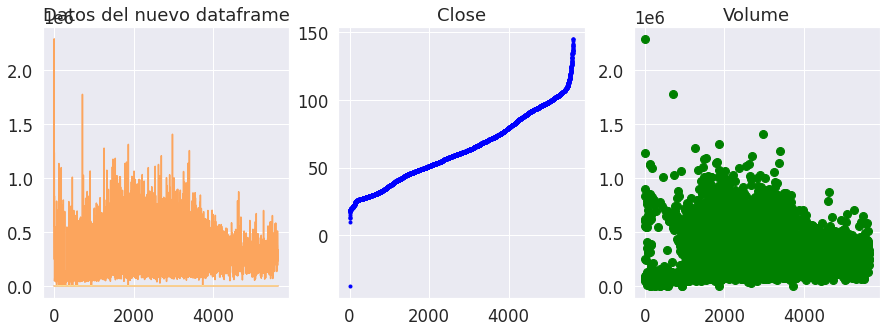

In [132]:
#Graficando los datos en escala original.
fig= plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
ax1.set_title("Datos del nuevo dataframe")
ax1.plot(df_agrup)
ax2.set_title("Close")
ax2.plot(df_agrup["Close"], linewidth=0, marker=".", color="blue", markersize=6)
ax3.set_title("Volume")
ax3.plot(df_agrup["Volume"], linewidth=0, marker=".", color="green", markersize=16)
plt.show()

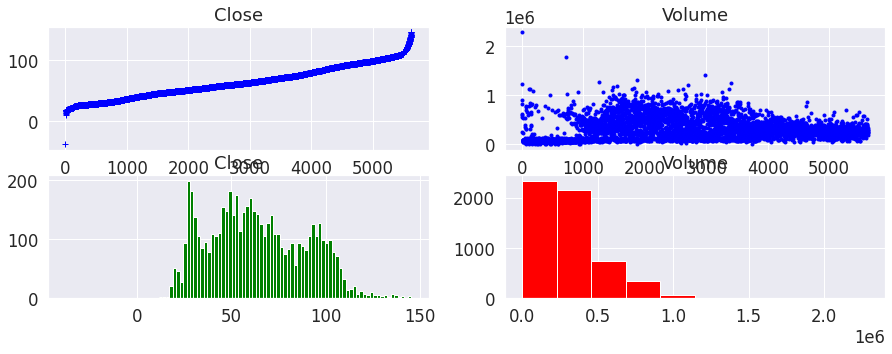

In [133]:
#Como se distribuyen los datos.
fig= plt.figure(figsize=(15,5))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)
ax1.set_title("Close")
ax1.plot(df_agrup["Close"], linewidth=0, marker="+", color="blue", markersize=6)
ax2.set_title("Volume")
ax2.plot(df_agrup["Volume"], linewidth=0, marker=".", color="blue", markersize=6)
ax3.set_title("Close")
ax3.hist(df_agrup["Close"], bins=100, color="green")
ax4.set_title("Volume")
ax4.hist(df_agrup["Volume"], color="red")
plt.show()

In [156]:
#Agrupamos variables para un nuevo dataframe llamado (df_agrup2)
df_agrup2=result_Total.groupby(['Close','Volume','manufacturingoutput','percapitaincome','index price','oil prices'])['Hecho_historico'].count().reset_index()
df_agrup2

Close   Volume  manufacturingoutput  percapitaincome  index price  \
0     -37.6   247947                558.2            19969      7,743.9   
1      10.0  2288230                558.2            19969      7,743.9   
2      12.3   897087                558.2            19969      7,743.9   
3      12.8   623201                558.2            19969      7,743.9   
4      13.8  1235218                558.2            19969      7,743.9   
...     ...      ...                  ...              ...          ...   
5995  141.6   294339                558.2            19969      7,743.9   
5996  143.6   253397                558.2            19969      7,743.9   
5997  145.1   334940                558.2            19969      7,743.9   
5998  145.2   252605                558.2            19969      7,743.9   
5999  145.3   193841                558.2            19969      7,743.9   

      oil prices  Hecho_historico  
0           25.5                1  
1           25.5                1  
2           25.5                1  
3           25.5                1  
4           25.5                1  
...          ...              ...  
5995        25.5                1  
5996        25.5                1  
5997        25.5                1  
5998        25.5                1  
5999        25.5                1  

[6000 rows x 7 columns]

In [157]:
# Renombramos las columnas que vamos a utilizar.
df_agrup2.rename(columns={
    'oil prices':'Oil'}) # Renombramos las columnas que vamos a utilizar.


Close   Volume  manufacturingoutput  percapitaincome  index price  Oil  \
0     -37.6   247947                558.2            19969      7,743.9 25.5   
1      10.0  2288230                558.2            19969      7,743.9 25.5   
2      12.3   897087                558.2            19969      7,743.9 25.5   
3      12.8   623201                558.2            19969      7,743.9 25.5   
4      13.8  1235218                558.2            19969      7,743.9 25.5   
...     ...      ...                  ...              ...          ...  ...   
5995  141.6   294339                558.2            19969      7,743.9 25.5   
5996  143.6   253397                558.2            19969      7,743.9 25.5   
5997  145.1   334940                558.2            19969      7,743.9 25.5   
5998  145.2   252605                558.2            19969      7,743.9 25.5   
5999  145.3   193841                558.2            19969      7,743.9 25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 7 columns]

In [158]:
#Se cambia la columna Close  de float a (int)
df_agrup2.Close=df_agrup2.Close.astype(int)
#Se cambia la columna Volume de float a (int)
df_agrup2.manufacturingoutput=df_agrup2.manufacturingoutput.astype(int)


In [159]:
#Se cambia la columna Close  de float a (int)
df_agrup2.Close=df_agrup2.Close.astype(int)
#Se cambia la columna Volume de float a (int)
df_agrup2.manufacturingoutput=df_agrup2.manufacturingoutput.astype(int)

In [160]:
#Decidimos sacar Index price de nuestro dataset para un mejor análisis y entrenamiento.
df_agrup2= df_agrup2.drop(columns=['index price'])
df_agrup2

Close   Volume  manufacturingoutput  percapitaincome  oil prices  \
0       -37   247947                  558            19969        25.5   
1        10  2288230                  558            19969        25.5   
2        12   897087                  558            19969        25.5   
3        12   623201                  558            19969        25.5   
4        13  1235218                  558            19969        25.5   
...     ...      ...                  ...              ...         ...   
5995    141   294339                  558            19969        25.5   
5996    143   253397                  558            19969        25.5   
5997    145   334940                  558            19969        25.5   
5998    145   252605                  558            19969        25.5   
5999    145   193841                  558            19969        25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 6 columns]

In [161]:
#Homogeneización de los datos, dataframe resul_total.
#Escalar en función de la Normalización del mínimo y míximo.
datos_min_max= preprocessing.MinMaxScaler().fit_transform(df_agrup2.T) # Toma el minimo(0) y el máximo(1) de cada columna.
datos_min_max

array([[0.00000000e+00, 3.93317277e-06, 1.22619236e-05, ...,
        4.29929032e-04, 5.70062232e-04, 7.42880726e-04],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [2.39934835e-03, 2.43419693e-04, 6.20899223e-04, ...,
        1.66298938e-03, 2.20503238e-03, 2.87350392e-03],
       [8.06745596e-02, 8.72639932e-03, 2.22587355e-02, ...,
        5.96168258e-02, 7.90486295e-02, 1.03012794e-01],
       [2.51841468e-04, 1.06862794e-05, 2.72578710e-05, ...,
        7.30062922e-05, 9.68023249e-05, 1.26148651e-04],
       [1.53235693e-04, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [162]:
#Normalización en función de la norma del vector.
datos_normalizar= preprocessing.Normalizer().fit_transform(df_agrup2.T)# Se toma la magnitud del vector y se garantiza que no tome valores mas altos de esa magnitud.
datos_normalizar= datos_normalizar.T
datos_normalizar# Normalizado=x/raiz_cuadrada(x_1**2+ x_2**2+ x_3**2 +....)-----el primer valor del vector elevandolo al cuadra + el sig elevandolo al cuadrado, se suma y se saca la raiz cuadrada.

array([[-0.00705165,  0.0086542 ,  0.01283375,  0.01259086,  0.01203974,
         0.01290994],
       [ 0.00190585,  0.07986709,  0.01283375,  0.01259086,  0.01203974,
         0.01290994],
       [ 0.00228702,  0.03131142,  0.01283375,  0.01259086,  0.01203974,
         0.01290994],
       ...,
       [ 0.02763485,  0.01169056,  0.01283375,  0.01259086,  0.01203974,
         0.01290994],
       [ 0.02763485,  0.00881678,  0.01283375,  0.01259086,  0.01203974,
         0.01290994],
       [ 0.02763485,  0.00676572,  0.01283375,  0.01259086,  0.01203974,
         0.01290994]])

In [163]:
#Estandarización (desv_std=1, media=0)
#StandardScaler utiliza la media de centralidad, Consiste en cambiar la distribución de los datos para que tengan una media= 0 y un std= 1, para aplicar mejor el ML por que trabaja bajo el supuesto de que los datos se distribuyen de forma normal.Por lo tanto nuestros datos estan mas distribuidos.
datos_Standar_scaler= preprocessing.StandardScaler().fit_transform(df_agrup2.T)# Estandarizado=(x-media)/ std
datos_Standar_scaler# que todos los valores sean parejos.

array([[-0.49121542, -0.45201691, -0.45942819, ..., -0.4787944 ,
        -0.48886711, -0.50110589],
       [ 2.22899655,  2.23598711,  2.23553904, ...,  2.23223534,
         2.22928786,  2.22447436],
       [-0.48468868, -0.45137317, -0.45778791, ..., -0.4754501 ,
        -0.48442047, -0.49529439],
       [-0.27176351, -0.42857079, -0.39947394, ..., -0.31826795,
        -0.27542853, -0.22215381],
       [-0.49053035, -0.45199876, -0.45938777, ..., -0.47976244,
        -0.49015424, -0.50278809],
       [-0.49079858, -0.45202748, -0.45946123, ..., -0.47996045,
        -0.49041751, -0.50313218]])

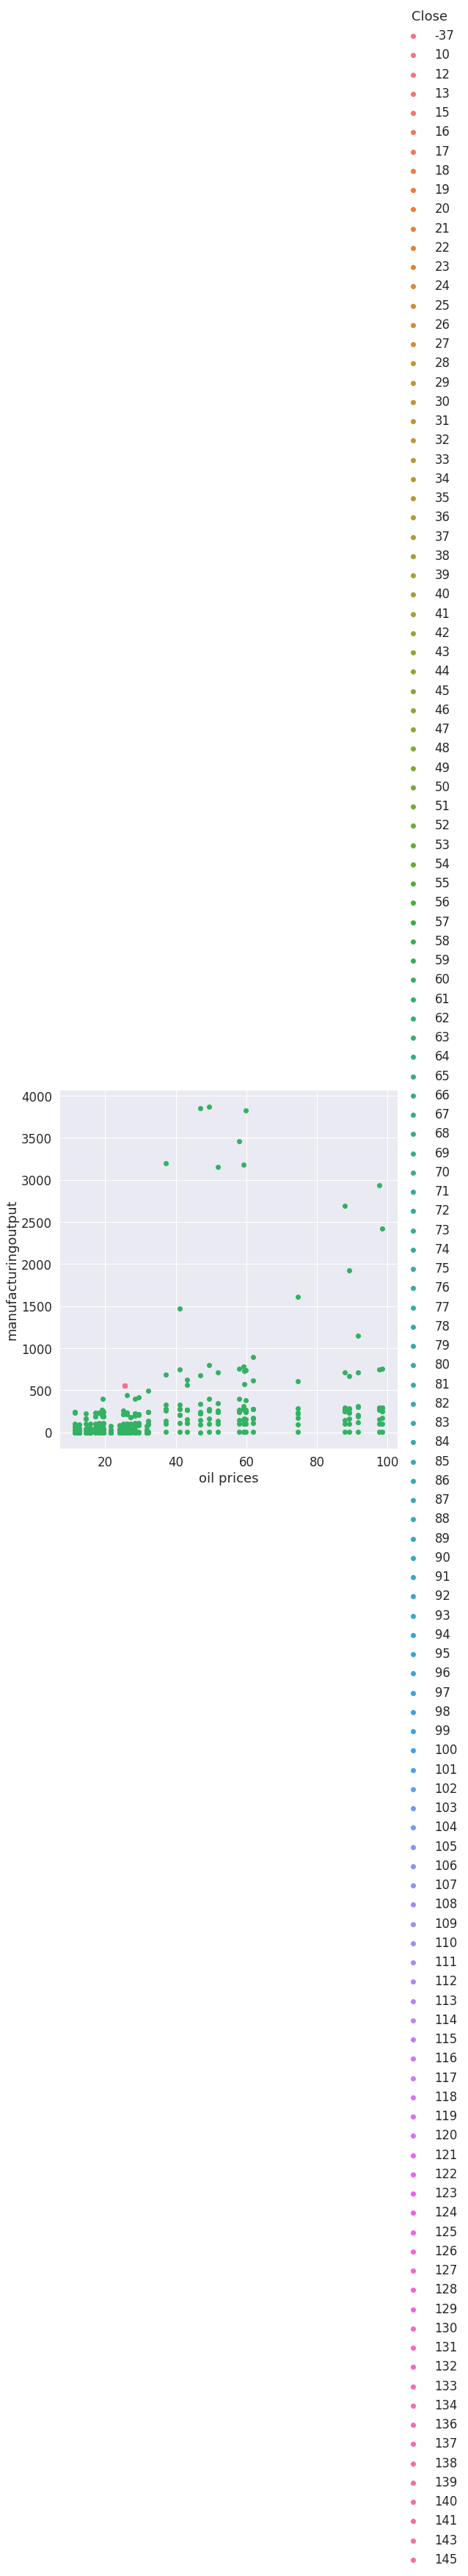

In [110]:
#Análisis Multivariado del Petroéo, Precio al consumidor y Hecho Historico.
#Vemos que los outliers por alto consumo y precio del petróleo promedio, corresponde a un hecho bélico y otro a un proceso político monetario , mientras que el mayor precio del petróleo se da en hechos bélicos-político y monetario en el transcurso de los últimos 40 años.
#Esto nos indica que a mayor producción el precio tiende a estabilizar un precio medio , mientras que a menor producción el precio del petroléo tiende a subir.
#FacetGrid
sns.FacetGrid(df_agrup2,hue = 'Close', size = 8).map(plt.scatter,'oil prices','manufacturingoutput').add_legend();
plt.show()

In [164]:
#RobustScaler utiliza el rango intercuartílico por lo tanto nuestros datos van a estar menos ditribuidos y de esa manera podemos sacar datos atípicos.
datos_robust_sacaler= preprocessing.RobustScaler().fit_transform(df_agrup2.T)# Estandarizado=(X-rango_intercuartílico)/std---se utiliza para sacar los datos atípicos.
datos_robust_sacaler

array([[-2.17567907e-02, -1.86544240e-02, -1.85238344e-02, ...,
        -1.37109904e-02, -1.37109904e-02, -1.37109904e-02],
       [ 1.63910934e+01,  1.51495144e+02,  5.93869276e+01, ...,
         2.22156887e+01,  1.67488878e+01,  1.28471316e+01],
       [ 1.76233544e-02,  1.76312311e-02,  1.76329825e-02, ...,
         1.37109904e-02,  1.37109904e-02,  1.37109904e-02],
       [ 1.30234267e+00,  1.30292476e+00,  1.30305418e+00, ...,
         1.30254409e+00,  1.30254409e+00,  1.30254409e+00],
       [-1.76233544e-02, -1.76312311e-02, -1.76329825e-02, ...,
        -2.16485813e-02, -2.16485813e-02, -2.16485813e-02],
       [-1.92417562e-02, -1.92503563e-02, -1.92522685e-02, ...,
        -2.32721654e-02, -2.32721654e-02, -2.32721654e-02]])

In [165]:
# Vectores con  Escalamiento estandar y el escalamiento Robusto.
datos_Standar_scaler,datos_robust_sacaler

(array([[-0.49121542, -0.45201691, -0.45942819, ..., -0.4787944 ,
         -0.48886711, -0.50110589],
        [ 2.22899655,  2.23598711,  2.23553904, ...,  2.23223534,
          2.22928786,  2.22447436],
        [-0.48468868, -0.45137317, -0.45778791, ..., -0.4754501 ,
         -0.48442047, -0.49529439],
        [-0.27176351, -0.42857079, -0.39947394, ..., -0.31826795,
         -0.27542853, -0.22215381],
        [-0.49053035, -0.45199876, -0.45938777, ..., -0.47976244,
         -0.49015424, -0.50278809],
        [-0.49079858, -0.45202748, -0.45946123, ..., -0.47996045,
         -0.49041751, -0.50313218]]),
 array([[-2.17567907e-02, -1.86544240e-02, -1.85238344e-02, ...,
         -1.37109904e-02, -1.37109904e-02, -1.37109904e-02],
        [ 1.63910934e+01,  1.51495144e+02,  5.93869276e+01, ...,
          2.22156887e+01,  1.67488878e+01,  1.28471316e+01],
        [ 1.76233544e-02,  1.76312311e-02,  1.76329825e-02, ...,
          1.37109904e-02,  1.37109904e-02,  1.37109904e-02],
        

In [166]:
result_Total.head(1)

index price  inflationrate  oil prices  exchange_rate  gdppercent  \
year                                                                         
1,980.0        168.6            0.1        21.6            1.0         0.1   

         percapitaincome  unemploymentrate  manufacturingoutput  tradebalance  \
year                                                                            
1,980.0            12575               0.1                  0.0         -13.1   

         Hecho_historico  Close  Volume  
year                                     
1,980.0              1.0   61.0  320000

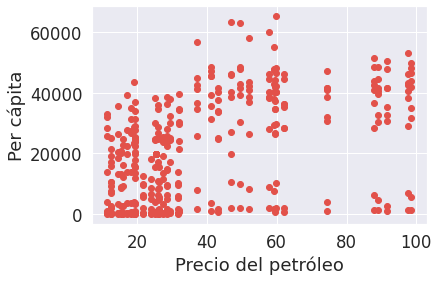

In [114]:
#Aqui vemos como a mayor poder adquisitivo el precio del petróleo tiende a promediarse, mientras a mayor precio del petróleo el poder adquisitivo tiende a bajar.
plt.scatter(df_agrup2["oil prices"], df_agrup2["percapitaincome"])
plt.xlabel("Precio del petróleo")
plt.ylabel("Per cápita")
plt.show()

In [167]:
df_reagrupar=df_agrup2.groupby(['oil prices','manufacturingoutput','percapitaincome'])['Hecho_historico'].count().reset_index()
df_reagrupar# Reagrupamos nuevamente los datos.

oil prices  manufacturingoutput  percapitaincome  Hecho_historico
0          11.3                    0               93                1
1          11.3                    0              829                1
2          11.3                    0            25809                1
3          11.3                   33             3807                1
4          11.3                   66              413                1
..          ...                  ...              ...              ...
365        98.6                  249            49883                1
366        98.6                  294             1458                1
367        98.6                  297            43848                1
368        98.6                  758            46706                1
369        98.6                 2421             5618                1

[370 rows x 4 columns]

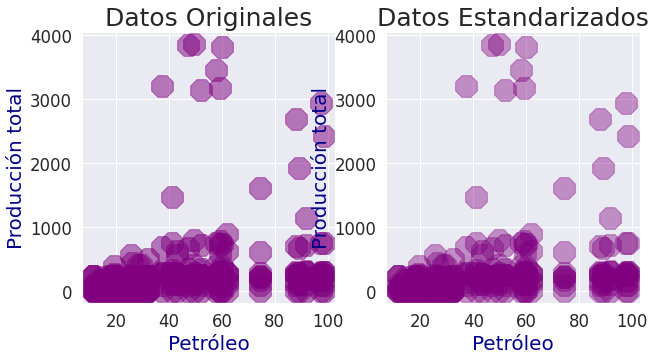

In [139]:
fig=plt.figure(figsize=(10,5))
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.set_title("Datos Originales", fontsize=25)
ax1.scatter(df_reagrupar["oil prices"],df_reagrupar["manufacturingoutput"],
      marker="8", s=550, color="purple", alpha=0.5)
ax1.set_xlabel("Petróleo", fontsize=20, color="darkblue")
ax1.set_ylabel("Producción total", fontsize=20, color="darkblue") 

# Estandarización de los datos,donde tenemos una media = 0 y una desviacion estandar = 1
datos_Standar_scaler1=preprocessing.StandardScaler().fit_transform(df_reagrupar.T),# Estandarizado=(x-media)/ std
columns=["oil prices","manufacturingoutput"]
datos_Standar_scaler1


ax2.set_title("Datos Estandarizados", fontsize=25)
ax2.scatter(df_reagrupar["oil prices"],df_reagrupar["manufacturingoutput"],
         marker="8", s=550, color="purple", alpha=0.4)
ax2.set_xlabel("Petróleo", fontsize=20, color="darkblue")
ax2.set_ylabel("Producción total", fontsize=20, color="darkblue")
plt.show()

In [168]:
datos_Standar_scaler1

(array([[-0.38684128, -0.55705622, -0.57670288, ..., -0.57911749,
         -0.58660656, -0.84752422],
        [-0.67979531, -0.58883001, -0.57771864, ..., -0.56863455,
         -0.55380288,  0.16913013],
        [ 1.72062098,  1.73191679,  1.73205067, ...,  1.73202331,
          1.7318691 ,  1.56862546],
        [-0.65398439, -0.58603056, -0.57762915, ..., -0.58427127,
         -0.59145966, -0.89023137]]),)

                     oil prices  manufacturingoutput  percapitaincome  \
oil prices                646.6              4,344.5        214,377.4   
manufacturingoutput     4,344.5            311,004.4        119,627.6   
percapitaincome       214,377.4            119,627.6    302,335,991.6   
Hecho_historico          -217.4              4,735.0        -11,395.9   

                     Hecho_historico  
oil prices                    -217.4  
manufacturingoutput          4,735.0  
percapitaincome            -11,395.9  
Hecho_historico             85,667.3  


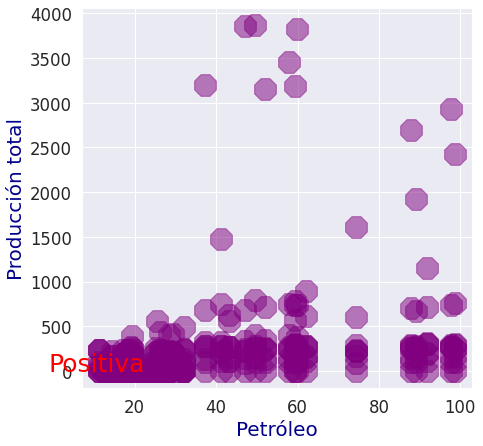

In [119]:
#Matriz de covarianza, calculo de covarianza y visualizacion.se pude usar como el análisis de datos, el modelado estadístico y la toma de decisiones financieras
# Metodo cov
print(df_reagrupar.cov())

fig=plt.figure(figsize=(7,7))
plt.scatter(df_reagrupar["oil prices"],df_reagrupar["manufacturingoutput"],
            marker="8", s=550, color="purple", alpha=0.5)
plt.xlabel("Petróleo", fontsize=20, color="darkblue")
plt.ylabel("Producción total", fontsize=20, color="darkblue")
plt.text(-1.2,1.5, "Positiva", fontsize=25, color="red")
plt.show()

Eigenvector rojo: [ 9.99899813e-01 -1.37655559e-02 -7.03431895e-04  3.22167266e-03] Eigenvector: 435.30800917337183
Eigenvector azul: [-7.09076613e-04 -3.96094483e-04 -9.99999669e-01  3.76976971e-05] Eigenvalor: 302336191.41617423


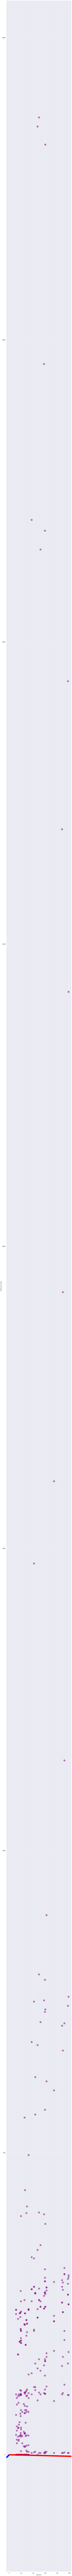

In [120]:
#Eigenvalores & Eigenvectores
# Un eigenvalor es un número que se utiliza para describir cómo una transformación matemática afecta a una serie de vectores.
#Los eigenvalores son útiles para entender cómo una transformación matemática cambia la distribución de los datos.
# Un eigenvector es un vector que se mantiene en la misma dirección después de ser transformado por una matriz.
# Los eigenvectores son útiles para entender cómo una transformación matemática cambia el tamaño de un vector.

#Calcular eigenvalores y eigenvectores
valores,vectores=eig(df_reagrupar.cov())#df_agrup2

vector_azul= vectores[:,0]
vector_rojo= vectores[:,1]

print("Eigenvector rojo:", vector_rojo, "Eigenvector:",valores[1])
print("Eigenvector azul:", vector_azul, "Eigenvalor:",valores[0])

#Visualizacion
plt.figure(figsize=(20,580))
plt.axes().set_aspect("equal")

#Grafica de los datos
plt.scatter(df_reagrupar["oil prices"],df_reagrupar["manufacturingoutput"],
          marker="8", s=550, color="purple", alpha=0.5)

#Graficando los Eigenvectores
plt.quiver(0,0,
           vector_azul[0]/abs(vector_azul[0])*valores[0],
           vector_azul[1]/abs(vector_azul[1])*valores[0],
           color="blue", angles="xy", scale_units="xy", scale=1, width=0.02)
plt.quiver(0,0,
           vector_rojo[0]/abs(vector_azul[0])*valores[1],
           vector_rojo[1]/abs(vector_azul[1])*valores[1],
           color="red", angles="xy", scale_units="xy", scale=1, width=0.02)


plt.xlabel("Petróleo", fontsize=15)
plt.ylabel("Producción total", fontsize=15)
plt.show()

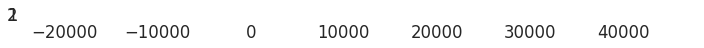

Varianza explicada por cada componente: [9.98688223e-01 1.02768653e-03 2.82652258e-04 1.43792571e-06]
Proporcion explicada por cada componente: [9.98688223e-01 1.02768653e-03 2.82652258e-04 1.43792571e-06]


In [169]:
from sklearn.decomposition import PCA

# Obtencion de los componentes principales

pca= PCA()
datos=pca.fit_transform(df_reagrupar)

#Visualizacion de el grafico
plt.figure(figsize=(12,9))
plt.axes().set_aspect("equal")
plt.scatter(datos[:,0],[2]*datos[:,1].size, s=250, color="red", alpha=0.5)#[2]*datos[:,0].size, debería ser datos[:,1]
plt.scatter(datos[:,1],[1]*datos[:,0].size, s=250, color="blue", alpha=0.5)# [1]*datos[:,1].size, debería ser datos[:,0]
plt.ylim((0.8,2.2))# lo corregi despues probar
plt.show()
print("Varianza explicada por cada componente:",pca.explained_variance_ratio_)
print("Proporcion explicada por cada componente:",pca.explained_variance_ratio_)

Cross-validation (o Validación Cruzada)

In [170]:
#Fase 1
#Random Forest (Bosque Aleatorio) para Clasificación con Scikit-Learn y Python.
print(df_reagrupar.sample(frac=2/3, replace=True))#Seleccionamos 2/3 de los datos

     oil prices  manufacturingoutput  percapitaincome  Hecho_historico
356        97.6                  265            53107                1
163        27.3                    0               83                1
76         19.0                   64              374                1
99         19.5                    0               89                1
106        19.5                  185            24342                1
..          ...                  ...              ...              ...
47         15.9                    0             9083                1
128        25.2                    0            24818                1
199        31.8                    0               32                1
244        47.0                    0            46324                1
342        89.2                 1924             4550                1

[247 rows x 4 columns]


In [171]:
#Fase 1
#Aleatoriedad,selección de características para divisiones.
from random import sample
print(df_agrup2.columns[:-1],"\n")#Ignoramos el hecho histórico.
print(sample(set(df_agrup2.columns[:-1]),4))

Index(['Close', 'Volume', 'manufacturingoutput', 'percapitaincome',
       'oil prices'],
      dtype='object') 

['Volume', 'Close', 'percapitaincome', 'manufacturingoutput']


In [172]:
#Asignamos un nuevo dataframe
dataframe=df_agrup2
dataframe

Close   Volume  manufacturingoutput  percapitaincome  oil prices  \
0       -37   247947                  558            19969        25.5   
1        10  2288230                  558            19969        25.5   
2        12   897087                  558            19969        25.5   
3        12   623201                  558            19969        25.5   
4        13  1235218                  558            19969        25.5   
...     ...      ...                  ...              ...         ...   
5995    141   294339                  558            19969        25.5   
5996    143   253397                  558            19969        25.5   
5997    145   334940                  558            19969        25.5   
5998    145   252605                  558            19969        25.5   
5999    145   193841                  558            19969        25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 6 columns]

In [173]:
#Creación de bosque aleatoreo, modelo de clasificación supervisado
#
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
bosque= RandomForestClassifier(n_estimators=100,
                               criterion="gini",
                               max_features="sqrt",
                               bootstrap=True,
                               max_samples=2/3,
                               oob_score=True) #Metríca para evaluar con las intancias de lo que queda 1/3, de los datos.

bosque.fit(dataframe[dataframe.columns[:-1]].values, dataframe["Close"].values)

print(bosque.predict([[98,128975,600,60000,1]]))
print(bosque.score(dataframe[dataframe.columns[:-1]].values,dataframe["Close"].values))# Devuelve cuantas instancias fueron clasificadas por este modelo 91.3%
print(bosque.oob_score_)

[60]
1.0
0.9151666666666667


In [174]:
#Fase 2 Entrenamiento de los datos.
#Se utiliza el 80% de los datos para entrenamiento y 20% de los datos para la validación de los datos.
datos_entrenamientoX= dataframe.sample(frac=0.80,random_state=0)# Se utiliza el 80% de los datos para el entrenamiento.
datos_test= dataframe.drop(datos_entrenamientoX.index)
datos_entrenamientoX.head(5).T# Muestra el 80%.

4320      2006      5689      472      1370
Close                    78.0      51.0     104.0      28.0     43.0
Volume              196,464.0 228,983.0 294,386.0 188,026.0 73,478.0
manufacturingoutput     558.0     558.0     558.0     558.0    558.0
percapitaincome      19,969.0  19,969.0  19,969.0  19,969.0 19,969.0
oil prices               25.5      25.5      25.5      25.5     25.5
Hecho_historico           1.0       1.0       1.0       1.0      1.0

In [175]:
#Se entrena sin columna de la variable a predecir oil prices.
etiquetas_entrenamientoY=datos_entrenamientoX.pop('oil prices')
etiquetas_test=datos_test.pop('oil prices')
etiquetas_entrenamientoY

4320   25.5
2006   25.5
5689   25.5
472    25.5
1370   25.5
       ... 
367    25.5
3436   25.5
4256   25.5
5807   25.5
4875   25.5
Name: oil prices, Length: 4800, dtype: float64

In [176]:
datos_entrenamientoX

Close  Volume  manufacturingoutput  percapitaincome  Hecho_historico
4320     78  196464                  558            19969                1
2006     51  228983                  558            19969                1
5689    104  294386                  558            19969                1
472      28  188026                  558            19969                1
1370     43   73478                  558            19969                1
...     ...     ...                  ...              ...              ...
367      27       0                  558            19969                1
3436     63  694628                  558            19969                1
4256     76  303284                  558            19969                1
5807    107  283710                  558            19969                1
4875     90  262878                  558            19969                1

[4800 rows x 5 columns]

In [177]:
#Modelo de regresión
modelo= LinearRegression()
modelo.fit(datos_entrenamientoX,etiquetas_entrenamientoY)# El modelo debe entrenarlo(fit) con datos_entrenamiento,etiquetas_entrenamiento.

LinearRegression()

In [178]:
#Vemos que se ha entrenado este modelo con  los datos de test..
predicciones= modelo.predict(datos_test)
predicciones

array([26.85181941, 26.74796716, 26.51605975, ..., 26.09608018,
       26.14144448, 26.0380016 ])

Los comparo con el valor real

In [179]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(etiquetas_test, predicciones)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(etiquetas_test, predicciones)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(etiquetas_test,predicciones))) # RMSE

Mean Absolute Error: 1.7495676068006834
Mean Squared Error: 29.665759752154948
Root Mean Squared Error: 5.446628292086302


Mean Squared Error: Tiene un grado de acierto de 544.6%.

In [180]:
error = np.sqrt(mean_squared_error(etiquetas_test, predicciones))
print("Error porcentual : %f" % (error*100))

Error porcentual : 544.662829


In [181]:
#Convertimos en df la salida
df_modelo = pd.DataFrame({'Real':etiquetas_test, 'Predicción': predicciones})
df_modelo

Real  Predicción
0     25.5        26.9
7     25.5        26.7
21    25.5        26.5
24    25.5        26.5
25    25.5        26.5
...    ...         ...
5980  25.5        26.1
5982  25.5        26.1
5983  25.5        26.1
5988  25.5        26.1
5997  25.5        26.0

[1200 rows x 2 columns]

In [182]:
def mse(Real,Predicción):
    return np.mean(np.square(Real-Predicción))

In [183]:
def mape(Real,Predicción):
    return np.mean(np.abs((Real-Predicción) /Real)) * 100

In [184]:
mape(etiquetas_test, predicciones)#porcentaje de error absoluto medio entre los valores reales y los valores previstos

5.763591162138319

In [185]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(etiquetas_test, predicciones))#Esta metrica se utiliza para medir la precisión de un modelo de regresión.
r2_score(etiquetas_test, predicciones)#Una puntuación R2 de 1 indica que el modelo explica toda la variabilidad de los datos, mientras que una puntuación R2 de 0 indica que el modelo no explica ninguna de la variabilidad de los datos. Una puntuación R2 negativa indica que el modelo es peor que un modelo de predicción constante.

El r^2 es: 0.23685104471950924


0.23685104471950924

In [186]:
#Generamos un nuevo evento del precio del pretróleo para corroborar la capacidad del modelo.
nuevo_PrecioPetro= pd.DataFrame(np.array([[98,128975,600,60500,1]]),columns=['Close','Volume','manufacturingoutput','percapitaincome','Hecho_historico'])
nuevo_PrecioPetro

Close  Volume  manufacturingoutput  percapitaincome  Hecho_historico
0     98  128975                  600            60500                1

In [187]:
modelo.predict(nuevo_PrecioPetro)# Se espera que el precio del petroléo sea de 56.3 usd.

array([56.3401661])

K Fold Cross Validation

In [188]:
from sklearn.model_selection import KFold 
from sklearn.linear_model import LinearRegression
import pandas as pd

# define the target variable and the predictor variables
X = dataframe.drop(['Volume','manufacturingoutput','percapitaincome','Close'], axis=1)
y = dataframe["oil prices"]

# define the number of folds
n_folds =3

#create the kfold object
kf = KFold(n_splits=n_folds)#

#loop through the folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # train the model
    model = LinearRegression()
    model.fit(X_train, y_train)
    # test the model
    y_pred = model.predict(X_test)
    # calculate the performance metric
    score = model.score(X_test, y_test)
    # append the score to the scores list
    scores=[]
    scores.append(score)
    print(scores)

[-35.0]
[1.0]
[-24.0]


Clasificador de Regresion Logística

In [189]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits
digits= load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data,digits.target,test_size=0.2)
ir=LogisticRegression()
ir.fit(X_train,y_train)
ir.score(X_test,y_test)

0.9722222222222222

Clasificación de soporte vectorial

In [190]:
from sklearn.svm import SVC
svm= SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)# El modelo es mucho mejor al de regresión logística

0.9972222222222222

Clasificador de RandonForest

In [191]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier(n_estimators=40)
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.9694444444444444

datafrane

In [192]:
dataframe

Close   Volume  manufacturingoutput  percapitaincome  oil prices  \
0       -37   247947                  558            19969        25.5   
1        10  2288230                  558            19969        25.5   
2        12   897087                  558            19969        25.5   
3        12   623201                  558            19969        25.5   
4        13  1235218                  558            19969        25.5   
...     ...      ...                  ...              ...         ...   
5995    141   294339                  558            19969        25.5   
5996    143   253397                  558            19969        25.5   
5997    145   334940                  558            19969        25.5   
5998    145   252605                  558            19969        25.5   
5999    145   193841                  558            19969        25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 6 columns]

In [193]:
#Preparacion de datos
X = dataframe.iloc[:, :1].values
y = dataframe.iloc[:,4].values

In [194]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [195]:
dataframe

Close   Volume  manufacturingoutput  percapitaincome  oil prices  \
0       -37   247947                  558            19969        25.5   
1        10  2288230                  558            19969        25.5   
2        12   897087                  558            19969        25.5   
3        12   623201                  558            19969        25.5   
4        13  1235218                  558            19969        25.5   
...     ...      ...                  ...              ...         ...   
5995    141   294339                  558            19969        25.5   
5996    143   253397                  558            19969        25.5   
5997    145   334940                  558            19969        25.5   
5998    145   252605                  558            19969        25.5   
5999    145   193841                  558            19969        25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 6 columns]

In [196]:
X

array([[-37],
       [ 10],
       [ 12],
       ...,
       [145],
       [145],
       [145]])

In [197]:
y

array([25.45265449, 25.45265449, 25.45265449, ..., 25.45265449,
       25.45265449, 25.45265449])

In [198]:
#Empezamos a crear nuestro modelo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
#Entrenando el modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [200]:
#Recuperamos la intersección
print(regressor.intercept_)#termino independiente

26.58390827893443


In [201]:
#La pendiente
print(regressor.coef_)

[-0.00442158]


In [202]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([26.37167247, 26.26997615, 26.46894722, ..., 26.31861352,
       26.1107993 , 26.37167247])

In [203]:
#Convertimos en df la salida
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

Actual  Predicted
0       25.5       26.4
1       25.5       26.3
2       25.5       26.5
3       25.5       26.4
4       25.5       26.2
...      ...        ...
1195    25.5       26.3
1196    25.5       26.4
1197    19.0       26.3
1198    25.5       26.1
1199    25.5       26.4

[1200 rows x 2 columns]

Evaluación del modelo:

El último paso es evaluar el rendimiento del algoritmo. Este paso es particularmente importante para comparar qué tan bien funcionan los diferentes algoritmos en un conjunto de datos en particular. Para los algoritmos de regresión, se utilizan tres métricas de evaluación:

El error absoluto medio (MAE) El error cuadrático medio (MSE) Root Mean Squared Error (RMSE)

In [204]:
import numpy as np
def mse(actual, predicted):
    return np.mean(np.square(actual-predicted))

In [205]:
def mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [206]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) # MAE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) # MSE
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) # RMSE

Mean Absolute Error: 2.087444073476311
Mean Squared Error: 55.91714630207047
Root Mean Squared Error: 7.477776828848964


Mean Squared Error: Tiene un grado de acierto de 747.7%.

In [207]:
error1 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error porcentual1 : %f" % (error1*100))

Error porcentual1 : 747.777683


In [208]:
from sklearn.metrics import r2_score
print('El r^2 es:',r2_score(y_test,y_pred))#Esta metrica se utiliza para medir la precisión de un modelo de regresión.
r2_score(y_test,y_pred)#Una puntuación R2 de 1 indica que el modelo explica toda la variabilidad de los datos, mientras que una puntuación R2 de 0 indica que el modelo no explica ninguna de la variabilidad de los datos. Una puntuación R2 negativa indica que el modelo es peor que un modelo de predicción constante.

El r^2 es: -0.00024843803039420465


-0.00024843803039420465

REGRESIÓN LINEAL MÚLTIPLE: La regresión lineal múltiple es un tipo de modelo estadístico que se utiliza para entender cómo varias variables independientes (también conocidas como predictoras o explicativas) afectan a una variable dependiente (también conocida como la respuesta).

In [209]:
dataframe

Close   Volume  manufacturingoutput  percapitaincome  oil prices  \
0       -37   247947                  558            19969        25.5   
1        10  2288230                  558            19969        25.5   
2        12   897087                  558            19969        25.5   
3        12   623201                  558            19969        25.5   
4        13  1235218                  558            19969        25.5   
...     ...      ...                  ...              ...         ...   
5995    141   294339                  558            19969        25.5   
5996    143   253397                  558            19969        25.5   
5997    145   334940                  558            19969        25.5   
5998    145   252605                  558            19969        25.5   
5999    145   193841                  558            19969        25.5   

      Hecho_historico  
0                   1  
1                   1  
2                   1  
3                   1  
4                   1  
...               ...  
5995                1  
5996                1  
5997                1  
5998                1  
5999                1  

[6000 rows x 6 columns]

In [210]:
#Estadisticas
dataframe.describe()

Close      Volume  manufacturingoutput  percapitaincome  oil prices  \
count 6,000.0     6,000.0              6,000.0          6,000.0     6,000.0   
mean     62.9   304,112.4                538.9         20,015.1        26.3   
std      25.0   210,550.1                157.2          4,316.1         7.2   
min     -37.0         0.0                  0.0             27.0        11.3   
25%      45.0   120,113.0                558.0         19,969.0        25.5   
50%      60.0   280,102.0                558.0         19,969.0        25.5   
75%      82.0   389,088.5                558.0         19,969.0        25.5   
max     145.0 2,288,230.0              3,868.0         65,280.0        98.6   

       Hecho_historico  
count          6,000.0  
mean               1.0  
std                0.0  
min                1.0  
25%                1.0  
50%                1.0  
75%                1.0  
max                1.0

In [211]:
#Preparación de datos
X1 = dataframe[['Volume','percapitaincome','manufacturingoutput']]
y1= dataframe['oil prices']# A predecir

In [212]:
#Separacion en train y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [213]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Como se dijo anteriormente, en caso de regresión lineal multivariable, el modelo de regresión tiene que encontrar los coeficientes más óptimos para todos los atributos. Para ver qué coeficientes ha elegido nuestro modelo de regresión, podemos ejecutar el siguiente script:

In [214]:
regressor.coef_# Valor de la pendiente, coeficientes de cada variable independiente.

array([ 2.92744018e-07,  7.50697313e-04, -1.86792211e-04])

In [215]:
regressor.intercept_#termino independiente

11.318793886271818

In [216]:
coeff_df = pd.DataFrame(regressor.coef_, X1.columns, columns=['Coefficient'])
coeff_df

Coefficient
Volume                       0.0
percapitaincome              0.0
manufacturingoutput         -0.0

In [217]:
#Evaluación de Modelos 
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))#RMS Debe ser menor para indicar si funciona el modelo.

Mean Absolute Error: 2.087444073476311
Mean Squared Error: 55.91714630207047
Root Mean Squared Error: 7.477776828848964


Mean Squared Error: Tiene un grado de acierto de  747.7%.

In [218]:
error2 = np.sqrt(mean_squared_error(y_test, y_pred))
print("Error porcentual2 : %f" % (error2*100))

Error porcentual2 : 747.777683


In [219]:
mape(y_test, y_pred)

5.878116252959041

In [220]:
from sklearn.metrics import r2_score#Esta metrica se utiliza para medir la precisión de un modelo de regresión.
r2_score(y_test,y_pred)#Una puntuación R2 de 1 indica que el modelo explica toda la variabilidad de los datos, mientras que una puntuación R2 de 0 indica que el modelo no explica ninguna de la variabilidad de los datos. Una puntuación R2 negativa indica que el modelo es peor que un modelo de predicción constante.

-0.00024843803039420465

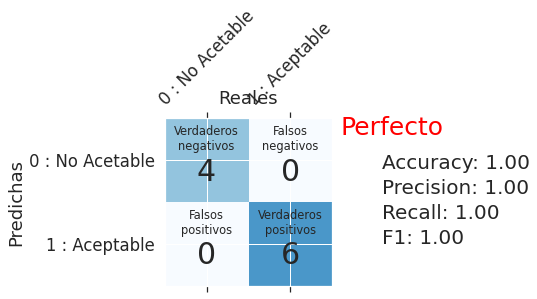

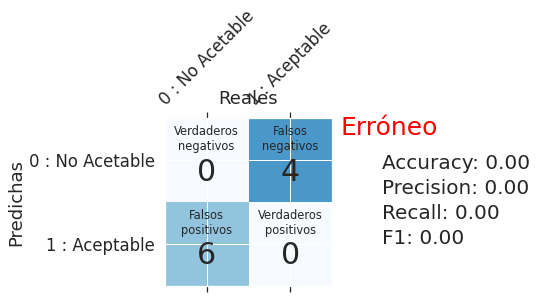

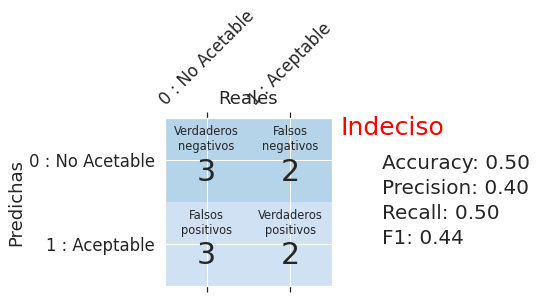

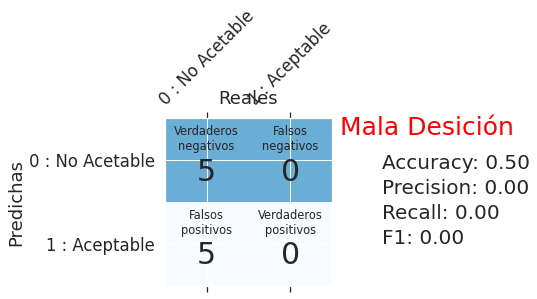

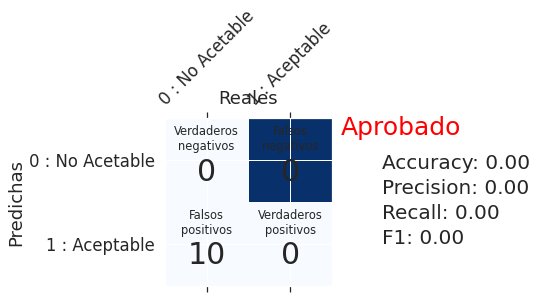

In [221]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix# Esta función toma dos conjuntos de etiquetas y devuelve una matriz de confusión, que es una tabla que muestra cuántas veces se predijeron correctamente o incorrectamente cada clase
from sklearn.metrics import accuracy_score#Esta función toma dos conjuntos de etiquetas y devuelve la precisión, que es la proporción de predicciones correctas sobre el total de predicciones 
from sklearn.metrics import precision_score#Esta función también toma dos conjuntos de etiquetas y calcula la precisión de clase, que es la proporción de predicciones correctas de una clase sobre el total de predicciones de esa clase.
from sklearn.metrics import recall_score# Es una métrica que se puede usar para evaluar el rendimiento de un modelo de clasificación. Se define como el número de predicciones verdaderas positivas realizadas por el modelo dividido por el número total de etiquetas positivas en los datos.
from sklearn.metrics import f1_score 

#  Calificaciones en Precios
#
# 0 : No acetable      40% 
# 1 : aceptable        60% 

def metricas(Actual, Predicted):
    """ Calcular las métricas utilizando sklearn """
    matriz = confusion_matrix(Actual, Predicted)
    accuracy = accuracy_score(Actual, Predicted)
    precision = precision_score(Actual, Predicted)
    recall = recall_score(Actual, Predicted)
    f1 = f1_score(Actual, Predicted)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(Actual, Predicted, titulo):
    """ Visualiza la matriz de confusión y métricas """
    
    #Código para calcular las métricas y matriz de confusión
    
    matriz, accuracy, precision, recall, f1 = \
                    metricas(Actual, Predicted)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : No Acetable", "1 : Aceptable"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=20)    
    plt.show()
    print("\n" * 10)

print("\n" * 10)

# Precios aceptable y No aceptable.
#
# 0 : No acetable      40% 
# 1 : acetable         60% 

Actual = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Clasificador perfecto 
Predicted = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
visualiza_metricas(Actual, Predicted, "Perfecto")

# Clasificador totalmente erróneo
Actual= [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
visualiza_metricas(Actual, Predicted, "Erróneo")

# Clasificador indeciso
Predicted = [1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
visualiza_metricas(Actual, Predicted, "Indeciso")

# Clasificador Mala Desición 
Actual = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
visualiza_metricas(Actual, Predicted, "Mala Desición ")

# Clasificador pasador
Predicted = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
visualiza_metricas(Actual, Predicted, "Aprobado")